## Ejecutar las simulaciones


In [3]:
schedule_names = ['fcfs', 'fcfs-hc', 'fcfs-sa', 'fcfs-sa-opt', 'fcfs-pso', 'sjf', 'sjf-hc', 'sjf-sa', 'sjf-sa-opt', 'sjf-pso', 'easy-backfill', 'easy-backfill-hc', 'easy-backfill-sa', 'easy-backfill-sa-opt', 'easy-backfill-pso']
nombres = ' '.join(schedule_names)
output_folder = 'output1'
workload = 'workload.json'
platform = 'small_platform.xml'

In [4]:
%%script false --no-raise-error
%%bash -s "$platform" "$workload" "$output_folder" "$nombres"
cd ..
./utils/scripts/run_sim_variables.sh $1 $2 $3 $4

## Imports


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import evalys
from evalys.jobset import JobSet

In [6]:
base_path = os.path.abspath(os.getcwd())
#remove all before the last '/sched-sim'
base_path = base_path[:base_path.rfind('sched-sim')+len('sched-sim')]
base_path

'/home/nk/sched-sim'

# Obteniendo los archivos a analizar


In [7]:
schedule_files = []
jobs_files = []
for folders in os.listdir(f'{base_path}/{output_folder}/'):
    for files in os.listdir(f'{base_path}/{output_folder}/' + folders):
        if files.endswith('_schedule.csv'):
            schedule_files.append(folders + "/" +  files)
        elif files.endswith('_jobs.csv'):
            jobs_files.append(folders + "/" + files)

schedule_files = [os.path.join(f'../{output_folder}', str(file)) for file in sorted(schedule_files)]
jobs_files = [os.path.join(f'../{output_folder}', str(file)) for file in sorted(jobs_files)]
print(schedule_files)
print(jobs_files)

['../output1/easy-backfill-hc/easy-backfill-hc_schedule.csv', '../output1/easy-backfill-pso/easy-backfill-pso_schedule.csv', '../output1/easy-backfill-sa-opt/easy-backfill-sa-opt_schedule.csv', '../output1/easy-backfill-sa/easy-backfill-sa_schedule.csv', '../output1/easy-backfill/easy-backfill_schedule.csv', '../output1/fcfs-hc/fcfs-hc_schedule.csv', '../output1/fcfs-pso/fcfs-pso_schedule.csv', '../output1/fcfs-sa-opt/fcfs-sa-opt_schedule.csv', '../output1/fcfs-sa/fcfs-sa_schedule.csv', '../output1/fcfs/fcfs_schedule.csv', '../output1/sjf-hc/sjf-hc_schedule.csv', '../output1/sjf-pso/sjf-pso_schedule.csv', '../output1/sjf-sa-opt/sjf-sa-opt_schedule.csv', '../output1/sjf-sa/sjf-sa_schedule.csv', '../output1/sjf/sjf_schedule.csv']
['../output1/easy-backfill-hc/easy-backfill-hc_jobs.csv', '../output1/easy-backfill-pso/easy-backfill-pso_jobs.csv', '../output1/easy-backfill-sa-opt/easy-backfill-sa-opt_jobs.csv', '../output1/easy-backfill-sa/easy-backfill-sa_jobs.csv', '../output1/easy-backfi

In [8]:
metrics = pd.DataFrame()
for file in schedule_files:
    print(file)
    schedule_name = os.path.basename(file).split('_')
    if schedule_name[0] in schedule_names:
        df = pd.read_csv(file)
        df['schedule'] = schedule_name[0]
        metrics = metrics.append(df)
    if schedule_name[1] in schedule_names:
        df = pd.read_csv(file)
        df['schedule'] = schedule_name[1]
        metrics = metrics.append(df)
    print("----")
metrics.set_index('schedule', inplace=True)

../output1/easy-backfill-hc/easy-backfill-hc_schedule.csv
----
../output1/easy-backfill-pso/easy-backfill-pso_schedule.csv
----
../output1/easy-backfill-sa-opt/easy-backfill-sa-opt_schedule.csv
----
../output1/easy-backfill-sa/easy-backfill-sa_schedule.csv
----
../output1/easy-backfill/easy-backfill_schedule.csv
----
../output1/fcfs-hc/fcfs-hc_schedule.csv
----
../output1/fcfs-pso/fcfs-pso_schedule.csv
----
../output1/fcfs-sa-opt/fcfs-sa-opt_schedule.csv
----
../output1/fcfs-sa/fcfs-sa_schedule.csv
----
../output1/fcfs/fcfs_schedule.csv
----
../output1/sjf-hc/sjf-hc_schedule.csv
----
../output1/sjf-pso/sjf-pso_schedule.csv
----
../output1/sjf-sa-opt/sjf-sa-opt_schedule.csv
----
../output1/sjf-sa/sjf-sa_schedule.csv
----
../output1/sjf/sjf_schedule.csv
----


In [9]:
jobsets = {}
for file in jobs_files:
    schedule_name = os.path.basename(file).split('_')
    if schedule_name[0] in schedule_names:
        print(f"{schedule_name[0]}")
        print("reading", file)
        jobsets[schedule_name[0]] = JobSet.from_csv(file)

easy-backfill-hc
reading ../output1/easy-backfill-hc/easy-backfill-hc_jobs.csv
easy-backfill-pso
reading ../output1/easy-backfill-pso/easy-backfill-pso_jobs.csv
easy-backfill-sa-opt
reading ../output1/easy-backfill-sa-opt/easy-backfill-sa-opt_jobs.csv
easy-backfill-sa
reading ../output1/easy-backfill-sa/easy-backfill-sa_jobs.csv
easy-backfill
reading ../output1/easy-backfill/easy-backfill_jobs.csv


fcfs-hc
reading ../output1/fcfs-hc/fcfs-hc_jobs.csv
fcfs-pso
reading ../output1/fcfs-pso/fcfs-pso_jobs.csv
fcfs-sa-opt
reading ../output1/fcfs-sa-opt/fcfs-sa-opt_jobs.csv
fcfs-sa
reading ../output1/fcfs-sa/fcfs-sa_jobs.csv
fcfs
reading ../output1/fcfs/fcfs_jobs.csv
sjf-hc
reading ../output1/sjf-hc/sjf-hc_jobs.csv
sjf-pso
reading ../output1/sjf-pso/sjf-pso_jobs.csv
sjf-sa-opt
reading ../output1/sjf-sa-opt/sjf-sa-opt_jobs.csv
sjf-sa
reading ../output1/sjf-sa/sjf-sa_jobs.csv
sjf
reading ../output1/sjf/sjf_jobs.csv


In [10]:
def calculate_compute_utilisation(schedule):
    compute_time = jobsets[schedule].df[['execution_time', 'requested_number_of_resources']].apply(lambda row: row.execution_time * row.requested_number_of_resources, axis=1).sum()
    return compute_time / (metrics.loc[schedule].makespan * 96)

def calculate_storage_utilisation(schedule):
    storage_time = jobsets[schedule].df[['execution_time', 'metadata']].apply(lambda row: row.execution_time * row.metadata, axis=1).sum()
    burst_buffer_capacity = 5 * 10**9
    num_burst_buffers = 12
    total_storage_time = metrics.loc[schedule].makespan * num_burst_buffers * burst_buffer_capacity
    return storage_time / total_storage_time

def create_metric_df(metric):
    return pd.concat([jobsets[schedule].df[metric].rename(schedule) for schedule in schedule_names], axis=1)

In [11]:
def bounded_slowdown(df):
    return (df.turnaround_time / df.execution_time.clip(lower=60)).clip(lower=1)

def create_all_metrics_df():
    dfs = []
    for schedule in schedule_names:
        df = jobsets[schedule].df
        df = df.assign(schedule=schedule).assign(bounded_slowdown=bounded_slowdown(df))[['schedule', 'waiting_time', 'turnaround_time', 'stretch']]
        dfs.append(df)
    df = pd.concat(dfs, axis=0).rename({'stretch': 'slowdown'}, axis=1)
    return df

In [12]:
metrics['compute_utilisation'] = pd.Series({schedule: calculate_compute_utilisation(schedule) for schedule in schedule_names})

In [13]:
metrics = metrics.reindex(schedule_names)
metrics.index.rename(None, inplace=True)
# sns.set_theme(context='talk', style='whitegrid')
sns.set_theme(style='whitegrid')

In [14]:
metrics.T

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
batsim_version,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0,4.2.0
consumed_joules,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
makespan,261070,261312,260984,261349,260984,261168,261222,260984,260984,260999,260984,260984,260984,260999,260984
max_slowdown,67553.6,58531.4,47672,33458.1,49484.8,46457.2,44362.6,75464.7,45514.2,59809,27746.2,39174,20281.3,59186.1,27799.4
max_turnaround_time,15984.5,17701,19776.6,18664.4,23258.2,17841,17248.2,18173,17645.3,20450.5,14783.5,21632,14571.3,18258,18781.8
max_waiting_time,15979.5,17672.5,19771.6,18616,23250.3,17830.3,17237.5,18171.1,17635.8,20450.2,14775.6,21413.4,14569.4,18250.1,18779.9
mean_slowdown,384.995,357.781,322.22,329.253,347.037,354.885,330.02,352.897,320.161,349.311,190.013,186.066,175.159,183.852,174.295
mean_turnaround_time,1993.14,2002.3,1851.18,1899.51,1949.2,1920.6,1867.8,1930.39,1822.01,1914.37,1140.9,1138.93,1123.14,1086.93,1121.75
mean_waiting_time,1859.85,1869.22,1717.51,1766.1,1816.25,1787.14,1734.02,1796.78,1688.39,1781.18,1007.75,1004.77,988.981,954.016,988.208
nb_computing_machines,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


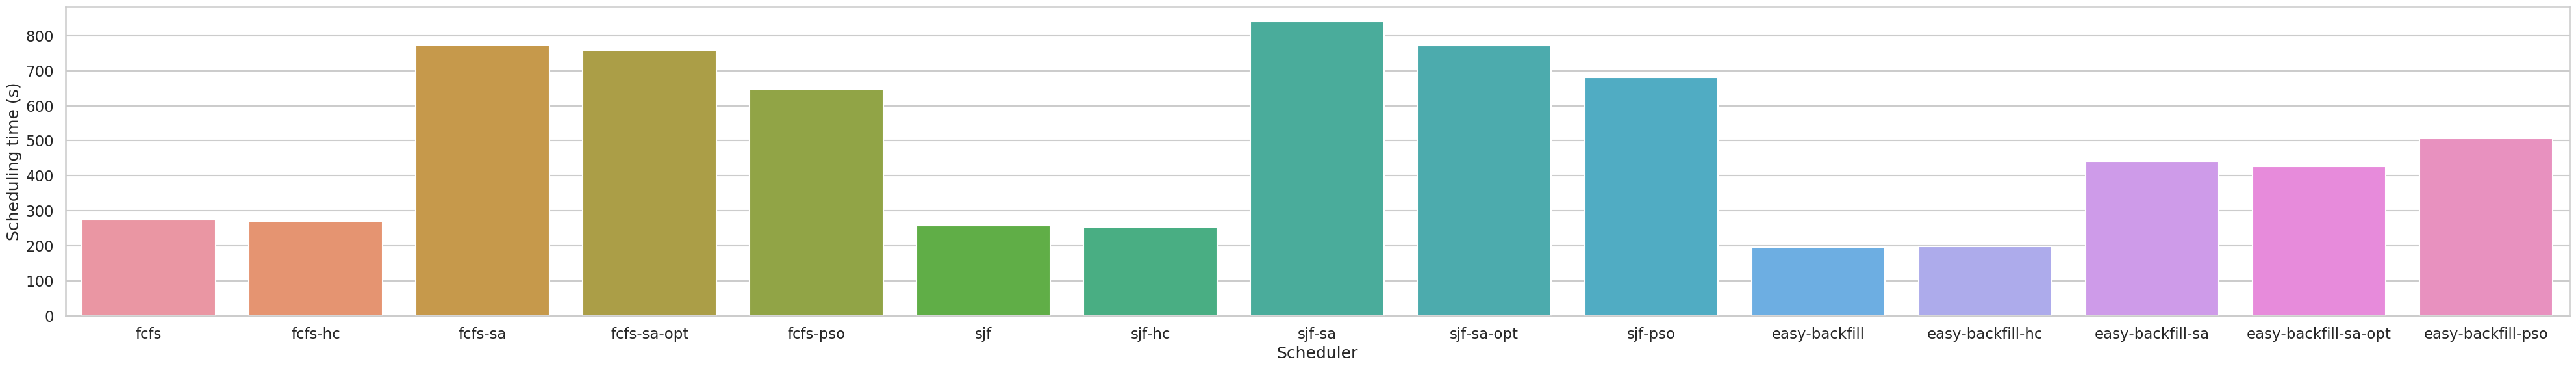

In [15]:
# Scheduling time
sns.set_theme(style='whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(40, 6))
sns.barplot(x=metrics.index, y=metrics.scheduling_time, ax=ax)
ax.set_ylabel('Scheduling time (s)')
ax.set_xlabel('Scheduler')
fig.tight_layout()
fig.savefig('scheduling_time.pdf', bbox_inches='tight')

In [16]:
# Scheduling time comparison table using pandas
metrics.scheduling_time.to_frame().T

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
scheduling_time,274.33362,270.104981,773.896231,757.785584,648.088278,257.926594,254.145533,840.796252,771.465937,680.067431,196.854095,197.702505,440.891065,426.809385,505.689485


In [17]:
import numpy as np
# Scheduling time comparison table using pandas. % performacnce vs others
sched_time = metrics.scheduling_time.to_frame()

# Initialize a matrix to hold the percentage improvement values
improvement_matrix = pd.DataFrame(index=sched_time.index, columns=sched_time.index)

# Calculate percentage improvement for each pair of algorithms
for i in sched_time.index:
    for j in sched_time.index:
        if i != j:
            # Percentage improvement is calculated as: (Value of j - Value of i) / Value of j * 100
            improvement_matrix.loc[i, j] = (sched_time.loc[j, 'scheduling_time'] - sched_time.loc[i, 'scheduling_time']) / sched_time.loc[j, 'scheduling_time'] * 100
        else:
            # No improvement over itself, set to NaN
            improvement_matrix.loc[i, j] = np.nan

improvement_matrix.fillna(0, inplace=True)  # Replacing NaN with 0 for no improvement
improvement_matrix

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
fcfs,0.000000,-1.565554,64.551627,63.797989,57.670331,-6.361122,-7.943514,67.372164,64.439957,59.660821,-39.358859,-38.760821,37.777460,35.724558,45.750579
fcfs-hc,1.541422,0.000000,65.098036,64.356015,58.322810,-4.721648,-6.279649,67.875097,64.988087,60.282618,-37.210750,-36.621932,38.736572,36.715314,46.586791
fcfs-sa,-182.100397,-186.516831,0.000000,-2.126017,-19.412163,-200.045148,-204.509083,7.956746,-0.315023,-13.796985,-293.131893,-291.444828,-75.530033,-81.321278,-53.037833
fcfs-sa-opt,-176.227749,-180.552243,2.081758,0.000000,-16.926291,-193.798934,-198.169940,9.872864,1.773293,-11.428007,-284.947839,-283.295894,-71.875922,-77.546608,-49.851956
fcfs-pso,-136.240924,-139.939403,16.256437,14.476035,0.000000,-151.268498,-155.006756,22.919699,15.992626,4.702350,-229.222655,-227.809846,-46.995104,-51.844899,-28.159334
sjf,5.980684,4.508761,66.671682,65.963117,60.201935,0.000000,-1.487754,69.323532,66.566691,62.073379,-31.024246,-30.461976,41.498793,39.568669,48.995065
sjf-hc,7.358955,5.908609,67.160257,66.462079,60.785353,1.465945,0.000000,69.773232,67.056804,62.629363,-29.103503,-28.549475,42.356388,40.454558,49.742769
sjf-sa,-206.486770,-211.284986,-8.644573,-10.954374,-29.734834,-225.982769,-230.832591,0.000000,-8.986828,-23.634248,-327.116465,-325.283560,-90.703854,-96.995727,-66.267300
sjf-sa-opt,-181.214507,-185.617072,0.314034,-1.805307,-19.037169,-199.102906,-203.552822,8.245793,0.000000,-13.439624,-291.897327,-290.215560,-74.978810,-80.751868,-52.557243
sjf-pso,-147.897954,-151.778930,12.124209,10.255956,-4.934382,-163.667046,-167.589764,19.116263,11.847381,0.000000,-245.467759,-243.985237,-54.248404,-59.337506,-34.483206


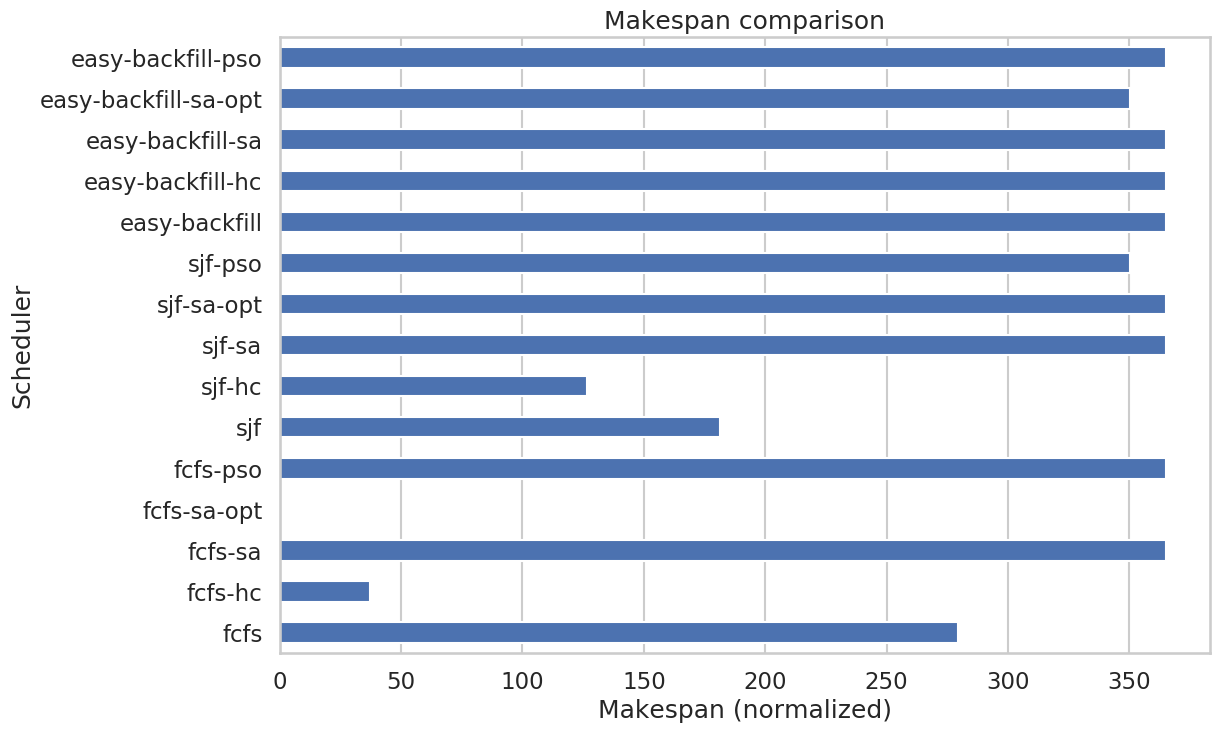

In [18]:
df_metrics = metrics.copy()
df_metrics['makespan'] = abs(df_metrics['makespan'] - df_metrics['makespan'].max())

ax = df_metrics['makespan'].plot.barh(figsize=(12, 8))
ax.set_xlabel('Makespan (normalized)')
ax.set_ylabel('Scheduler')
ax.set_title('Makespan comparison') 
ax.grid(axis='y')

In [19]:
metrics_df = create_all_metrics_df()
metrics_df

,schedule,waiting_time,turnaround_time,slowdown
0,fcfs,0.000030,19.717915,1.000002
1,fcfs,19.719885,96.082207,1.258241
2,fcfs,96.084178,101.697788,18.116289
3,fcfs,101.699759,120.199439,6.497379
4,fcfs,19.719900,331.307441,1.063288
...,...,...,...,...
2445,easy-backfill-pso,1786.255696,2440.638118,3.729682
2446,easy-backfill-pso,2440.640109,2443.051514,1013.123764
2447,easy-backfill-pso,2443.052991,2454.255854,219.073978
2448,easy-backfill-pso,2454.257331,2466.224970,206.074485


# Waiting Time


In [20]:
waiting_times = create_metric_df('waiting_time')
waiting_times.describe()

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,1859.854438,1869.219593,1717.511304,1766.103247,1816.251651,1787.141421,1734.020775,1796.782713,1688.390724,1781.177855,1007.751128,1004.770790,988.980637,954.015858,988.208268
std,2456.555730,2659.527544,2443.326898,2511.608079,2873.770497,2633.121662,2579.359781,2666.187332,2524.293168,2683.397296,1608.219207,1694.041620,1741.246975,1690.233533,1874.564159
min,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030,0.000030
25%,225.395791,160.000045,140.336053,146.366201,124.887682,91.465156,104.549358,125.280907,92.392671,122.290782,30.538780,32.120001,33.394781,30.959423,29.583708
50%,1042.528974,931.596476,872.374111,883.149828,847.011788,831.401689,806.225975,829.428268,775.274954,799.936388,392.430024,414.069328,366.947042,331.404378,355.117026
75%,2363.795390,2342.158915,2228.160139,2198.160805,2273.633357,2296.503031,2214.458712,2240.771088,2149.518119,2262.630580,1262.565636,1246.148329,1207.811781,1175.299686,1152.676006
max,15979.455910,17672.545649,19771.580221,18615.986201,23250.325970,17830.260609,17237.522965,18171.132972,17635.773337,20450.166674,14775.611934,21413.373151,14569.399158,18250.079454,18779.873516


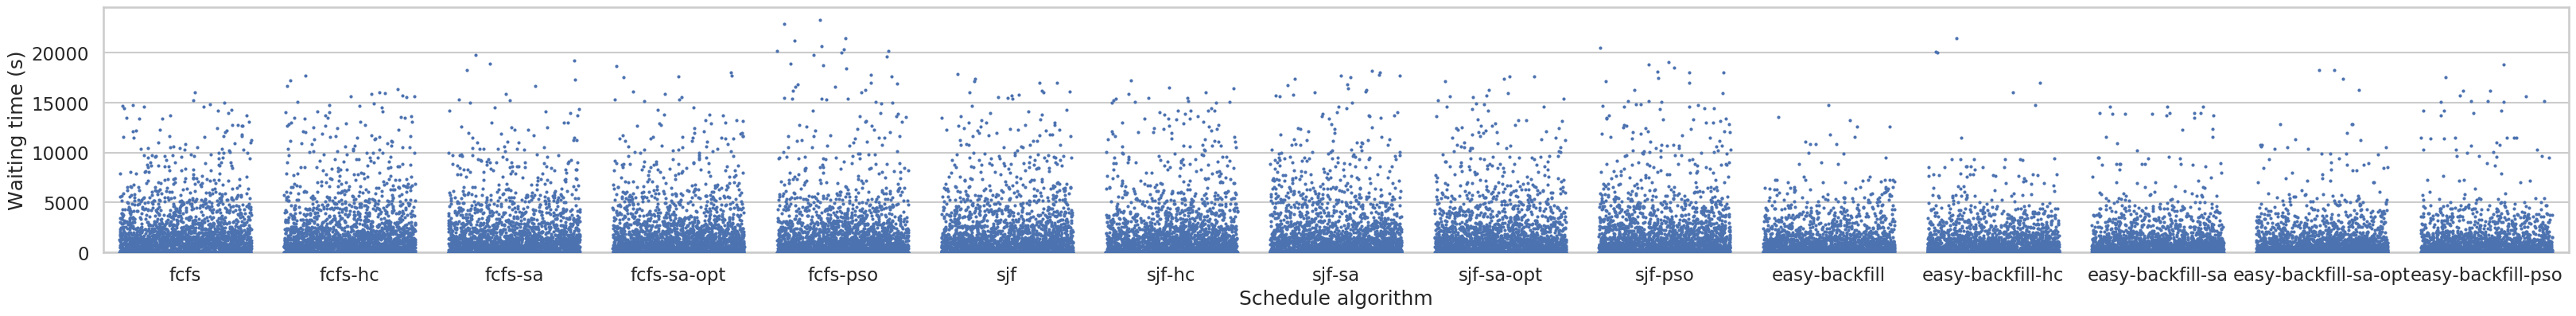

In [21]:
largest = pd.concat([metrics_df[metrics_df.schedule == schedule][['schedule', 'waiting_time']].nlargest(n=4000, columns='waiting_time') for schedule in schedule_names])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(40,4))
    sns.stripplot(data=largest, x='schedule', y='waiting_time', ax=ax, size=3, jitter=0.4)
    ax.set_ylim(0)
    ax.set_ylabel('Waiting time (s)')
    ax.set_xlabel('Schedule algorithm')
fig.savefig('results/waiting-time_dist.pdf', bbox_inches='tight')

Text(0.5, 0, 'Schedule algorithm')

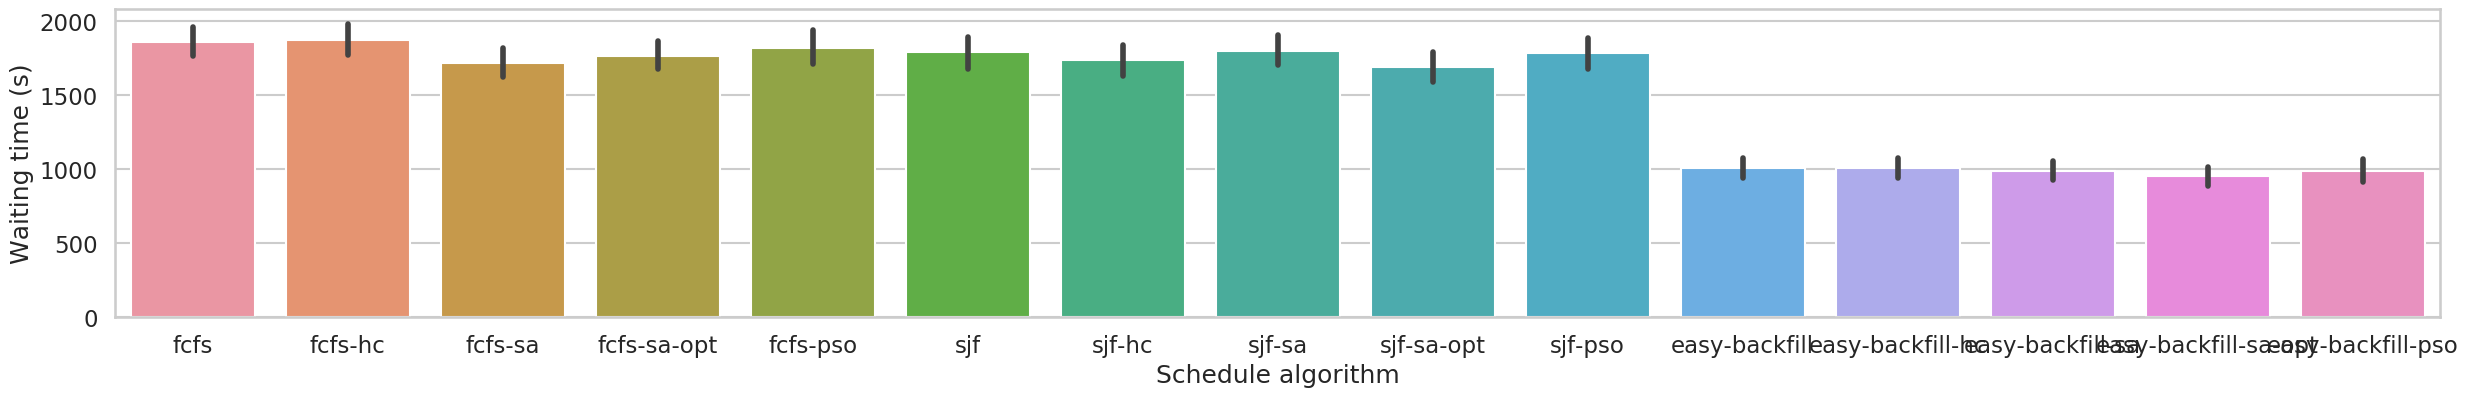

In [22]:
fig, ax = plt.subplots(figsize=(30,4))
sns.barplot(data=waiting_times, ax=ax)
ax.set_ylabel('Waiting time (s)')
ax.set_xlabel('Schedule algorithm')
#fig.savefig('results/waiting-time_mean.pdf', bbox_inches='tight')

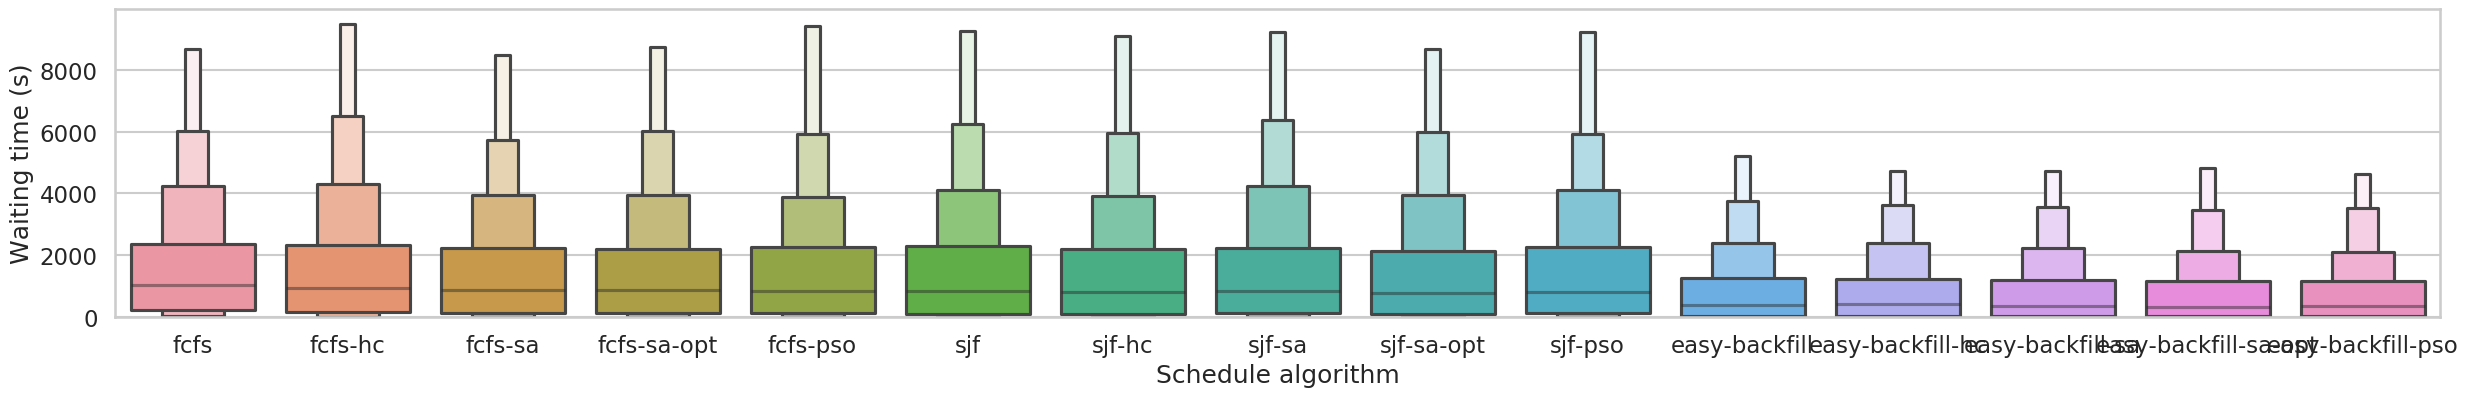

In [23]:
fig, ax = plt.subplots(figsize=(30,4))
sns.boxenplot(data=waiting_times, k_depth=4, showfliers=False, ax=ax)
ax.set_ylim(0)
# ax.set_ylim(top=140000)
ax.set_ylabel('Waiting time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/waiting-time_boxen.pdf', bbox_inches='tight')

In [24]:
# improve between 2 algorithms, just % in mean of 2 algorithms as input. Example fcfs vs sjf
waiting_times_copy = waiting_times.copy()
improve = -(1 - (waiting_times_copy['sjf'] / waiting_times_copy['fcfs'])) * 100

# Verificar si hay valores infinitos o muy grandes y calcular la media
is_infinite = improve == float('inf')
mean_improve = improve[~is_infinite].mean()

mean_improve, is_infinite.any()

(4451698.824525971, False)

# Turnarround Time


In [25]:
turnaround_times = create_metric_df('turnaround_time')
turnaround_times.describe()

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,1993.135829,2002.299174,1851.181924,1899.511944,1949.196692,1920.603502,1867.802765,1930.385530,1822.008305,1914.366690,1140.903382,1138.928340,1123.144440,1086.929851,1121.750924
std,2474.493959,2677.680639,2467.195249,2534.515925,2896.331549,2651.941708,2597.719346,2685.035911,2545.193320,2703.510138,1666.079415,1744.891237,1796.855379,1747.497757,1923.057000
min,0.217383,0.307705,0.217368,0.217383,0.307705,0.217383,0.217368,0.307705,0.307705,0.217383,0.217368,0.217368,0.307705,0.217383,0.307705
25%,368.236092,311.713663,282.991984,314.008137,241.538973,223.361942,215.832233,248.687544,204.101420,263.033661,70.964799,76.937182,77.919880,70.049528,69.179817
50%,1225.993548,1071.963579,1016.246048,1043.411757,1004.446774,992.279873,987.792617,993.075660,963.178318,966.240202,521.420902,542.372998,513.771430,494.202863,509.003781
75%,2535.583693,2513.195032,2358.281629,2416.206430,2410.600748,2499.833054,2367.586881,2410.325842,2353.585833,2406.826993,1474.075469,1439.987163,1359.956472,1326.187666,1335.429760
max,15984.460197,17701.028117,19776.584508,18664.381281,23258.199580,17840.972814,17248.235170,18173.010091,17645.343150,20450.508604,14783.485544,21631.998999,14571.283236,18257.953064,18781.750635


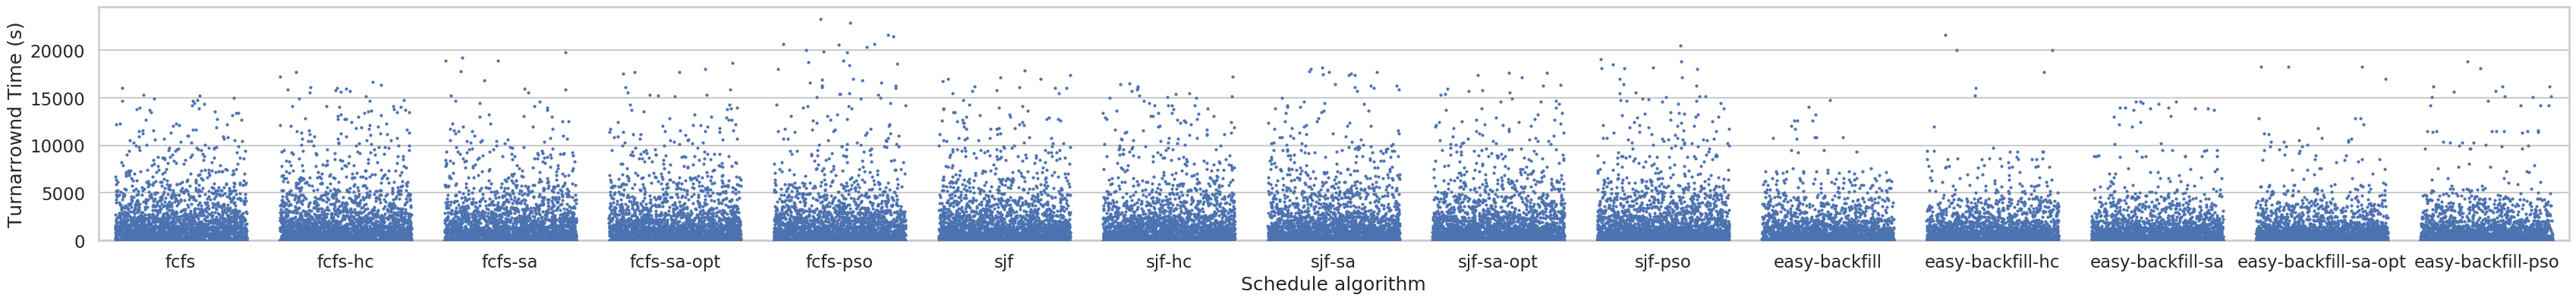

In [26]:
largest = pd.concat([metrics_df[metrics_df.schedule == schedule][['schedule', 'turnaround_time']].nlargest(n=4000, columns='turnaround_time') for schedule in schedule_names])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(42,4))
    sns.stripplot(data=largest, x='schedule', y='turnaround_time', ax=ax, size=3, jitter=0.4)
    ax.set_ylim(0)
#     ax.set_ylim(top=2.5*10**6)

    ax.set_ylabel('Turnarrownd Time (s)')
    ax.set_xlabel('Schedule algorithm')
fig.savefig('results/turnaround-time_dist.pdf', bbox_inches='tight')

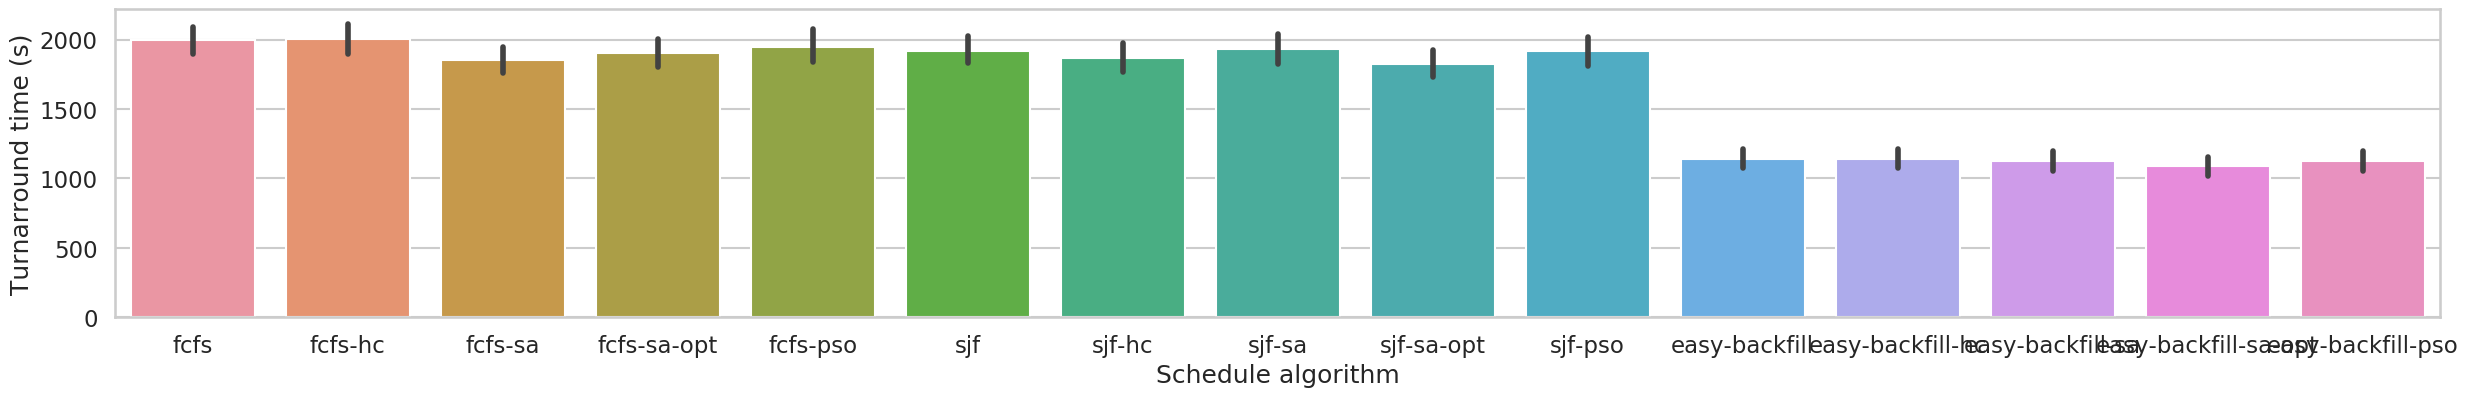

In [27]:
fig, ax = plt.subplots(figsize=(30,4))
sns.barplot(data=turnaround_times, ax=ax)
ax.set_ylabel('Turnarround time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/turnaround-time_mean.pdf', bbox_inches='tight')

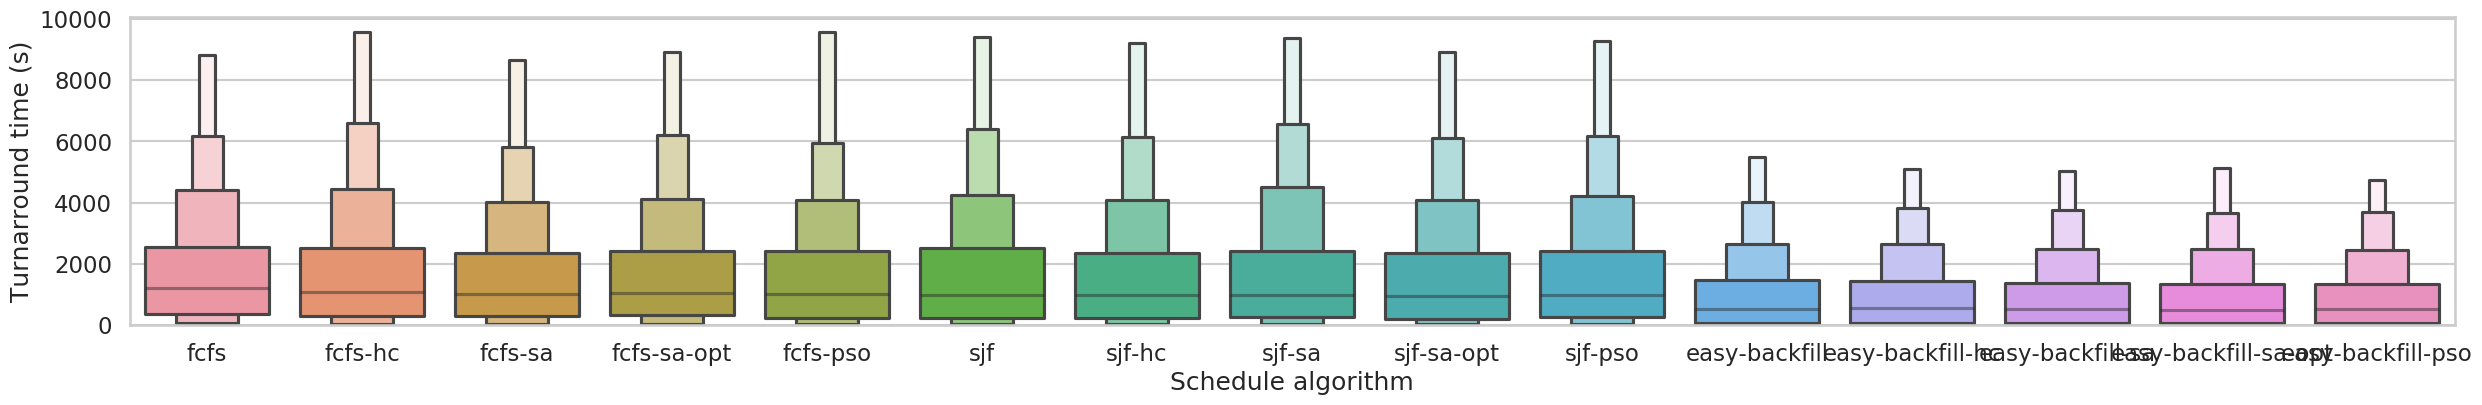

In [28]:
fig, ax = plt.subplots(figsize=(30,4))
sns.boxenplot(data=turnaround_times, k_depth=4, showfliers=False, ax=ax)
ax.set_ylim(0)
# ax.set_ylim(top=140000)
ax.set_ylabel('Turnarround time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/turnaround-time_boxen.pdf', bbox_inches='tight')

# Slowdown


In [29]:
slowdown = create_metric_df('stretch')
slowdown.describe()

,fcfs,fcfs-hc,fcfs-sa,fcfs-sa-opt,fcfs-pso,sjf,sjf-hc,sjf-sa,sjf-sa-opt,sjf-pso,easy-backfill,easy-backfill-hc,easy-backfill-sa,easy-backfill-sa-opt,easy-backfill-pso
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,384.995201,357.781139,322.220235,329.253473,347.037361,354.885370,330.019987,352.897376,320.160537,349.311332,190.012579,186.066340,175.159355,183.851511,174.294715
std,2012.460374,1704.327052,1504.410132,1371.000382,1769.531836,1761.091783,1531.428075,2135.395139,1627.132654,1982.079891,1084.798295,1105.807400,880.912579,1405.709729,944.299216
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.999131,3.616332,3.457310,3.541471,3.236981,2.709113,3.164334,3.318052,2.921110,3.249995,2.137837,2.159689,2.176037,2.121577,2.077722
50%,38.329465,31.797160,31.407686,32.619631,29.217576,25.929375,25.299644,26.608095,24.449790,28.617522,9.657220,9.938650,10.032464,9.554322,9.108588
75%,205.894542,190.193893,168.726654,169.780157,172.698712,168.433726,158.380210,171.224772,154.860660,161.941088,75.423721,76.543227,68.243406,68.028950,68.763601
max,67553.551752,58531.358076,47671.952056,33458.109769,49484.767183,46457.158793,44362.581022,75464.669158,45514.166544,59808.995500,27746.150372,39174.028605,20281.281978,59186.062706,27799.438217


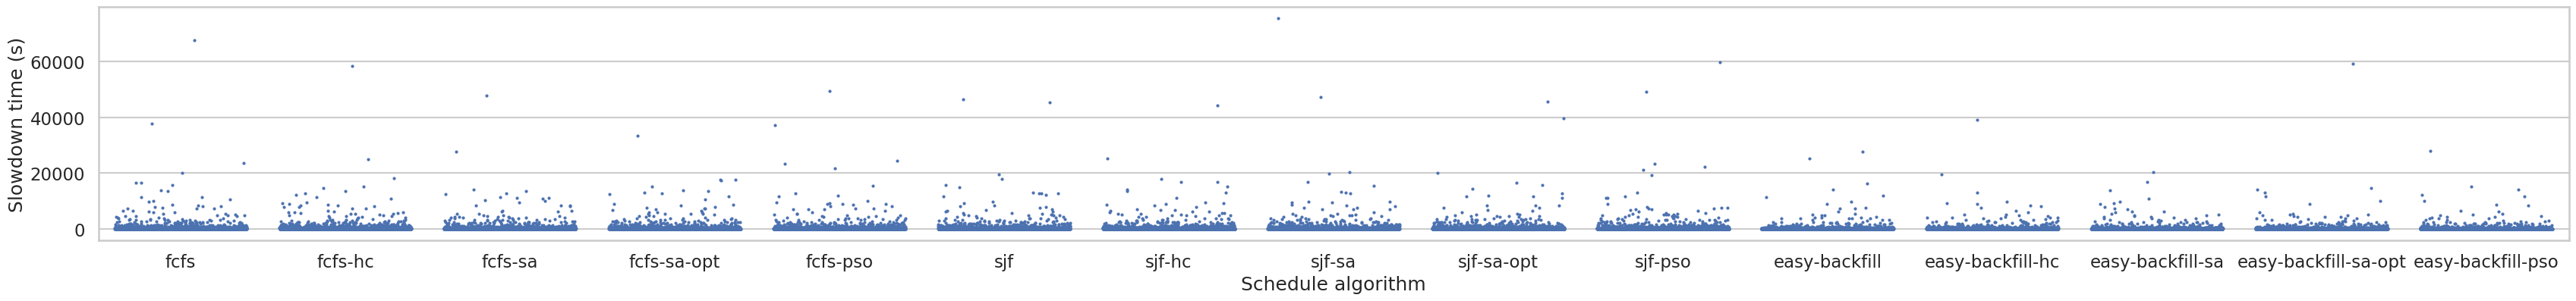

In [30]:
# Scatterplot, outliers
largest = pd.concat([metrics_df[metrics_df.schedule == schedule][['schedule', 'slowdown']].nlargest(n=4000, columns='slowdown') for schedule in schedule_names])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(figsize=(42,4))
    sns.stripplot(data=largest, x='schedule', y='slowdown', ax=ax, size=3, jitter=0.4)
    ax.set_ylabel('Slowdown time (s)')
    ax.set_xlabel('Schedule algorithm')
fig.savefig('results/slowdown_dist.pdf', bbox_inches='tight')

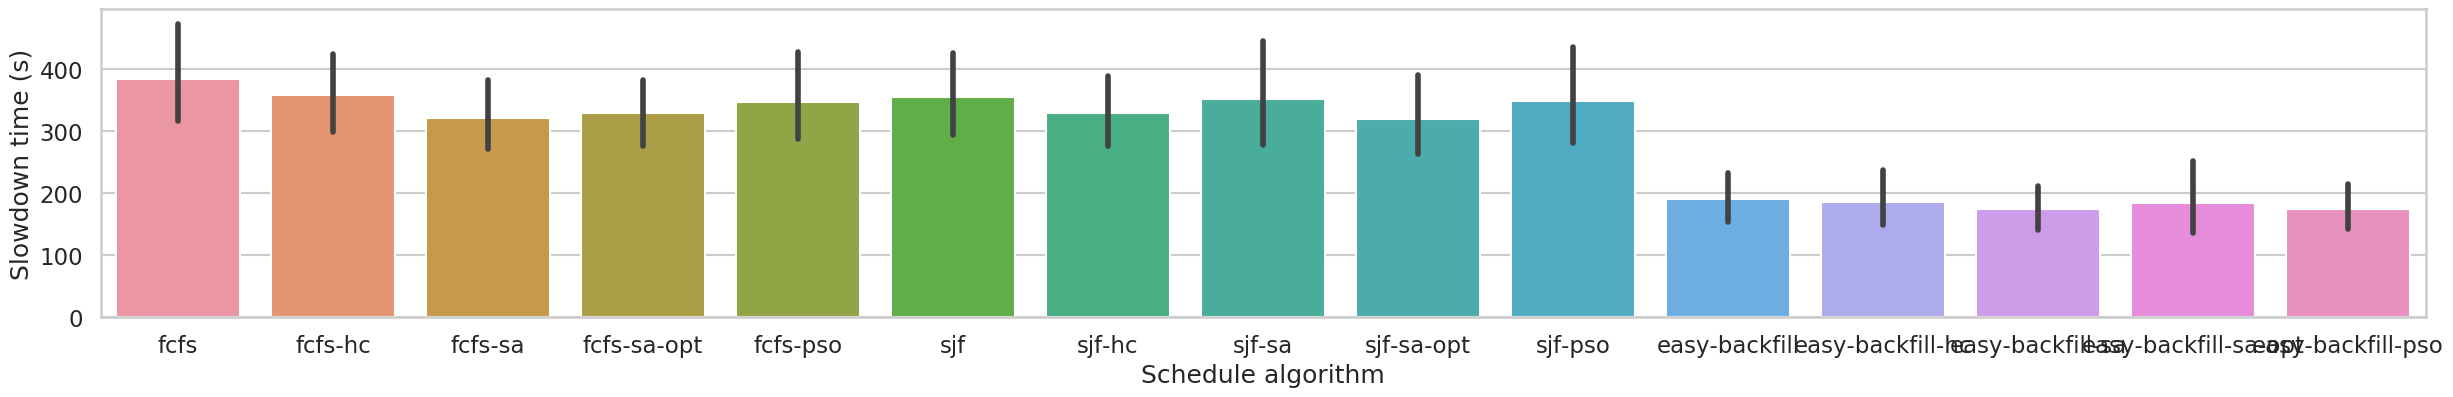

In [31]:
# Mean, logscale
fig, ax = plt.subplots(figsize=(30,4))
sns.barplot(data=slowdown, ax=ax)
ax.set_ylabel('Slowdown time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/slowdown_mean.pdf', bbox_inches='tight')

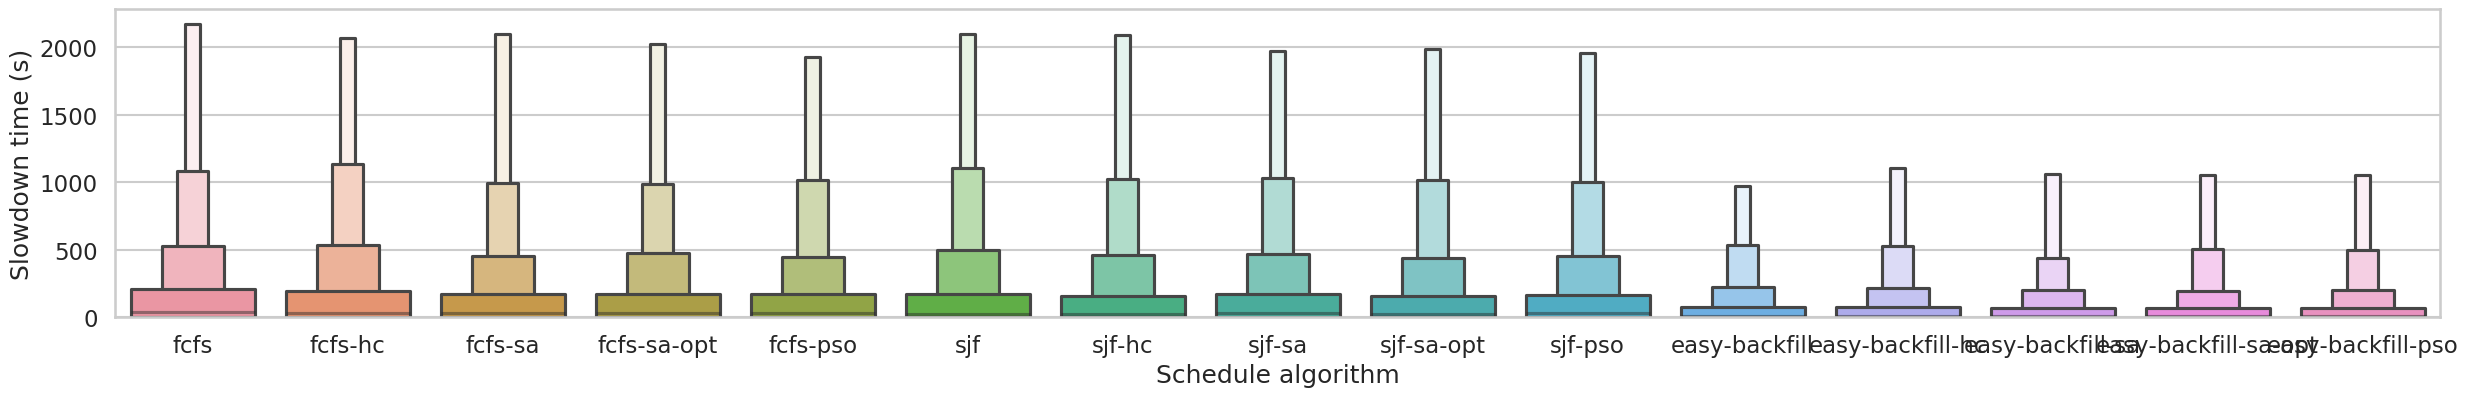

In [32]:
fig, ax = plt.subplots(figsize=(30,4))
sns.boxenplot(data=slowdown, k_depth=4, showfliers=False, ax=ax)
ax.set_ylim(0)
# ax.set_ylim(top=140000)
ax.set_ylabel('Slowdown time (s)')
ax.set_xlabel('Schedule algorithm')
fig.savefig('results/slowdown_boxen.pdf', bbox_inches='tight')

fcfs: 0.025913997141164723
fcfs-hc: 0.02587024817747721
fcfs-sa: 0.025960539817202328
fcfs-sa-opt: 0.025898711289068125
fcfs-pso: 0.025889587658115883


sjf: 0.025921914936084374
sjf-hc: 0.025947744349088753
sjf-sa: 0.025953909604242237
sjf-sa-opt: 0.025955353299850804
sjf-pso: 0.02591197106999592
easy-backfill: 0.025909850484634473
easy-backfill-hc: 0.026008155160193277
easy-backfill-sa: 0.026008766681241
easy-backfill-sa-opt: 0.025885096613468144
easy-backfill-pso: 0.025948026677336155


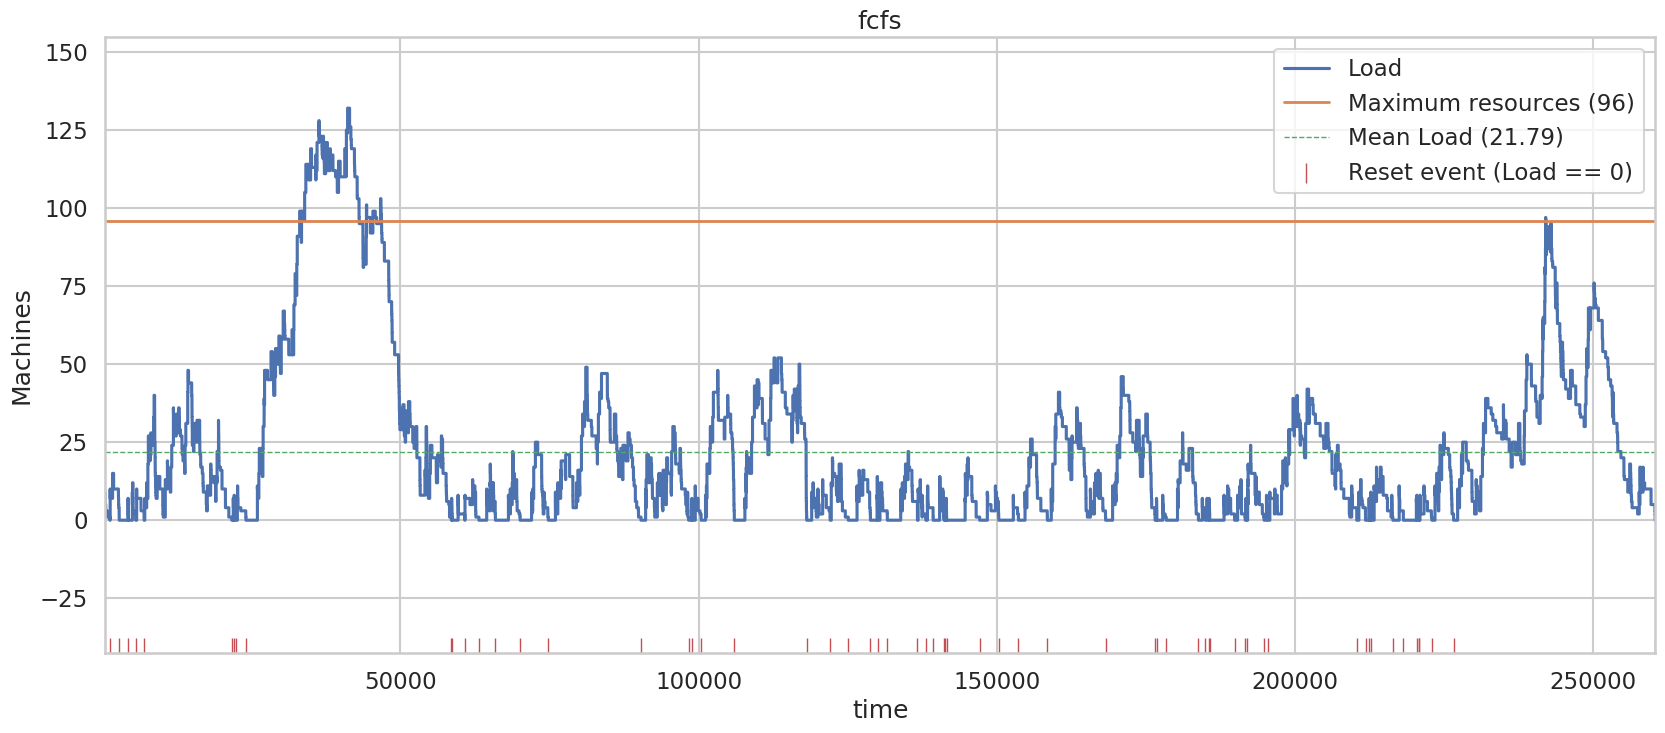

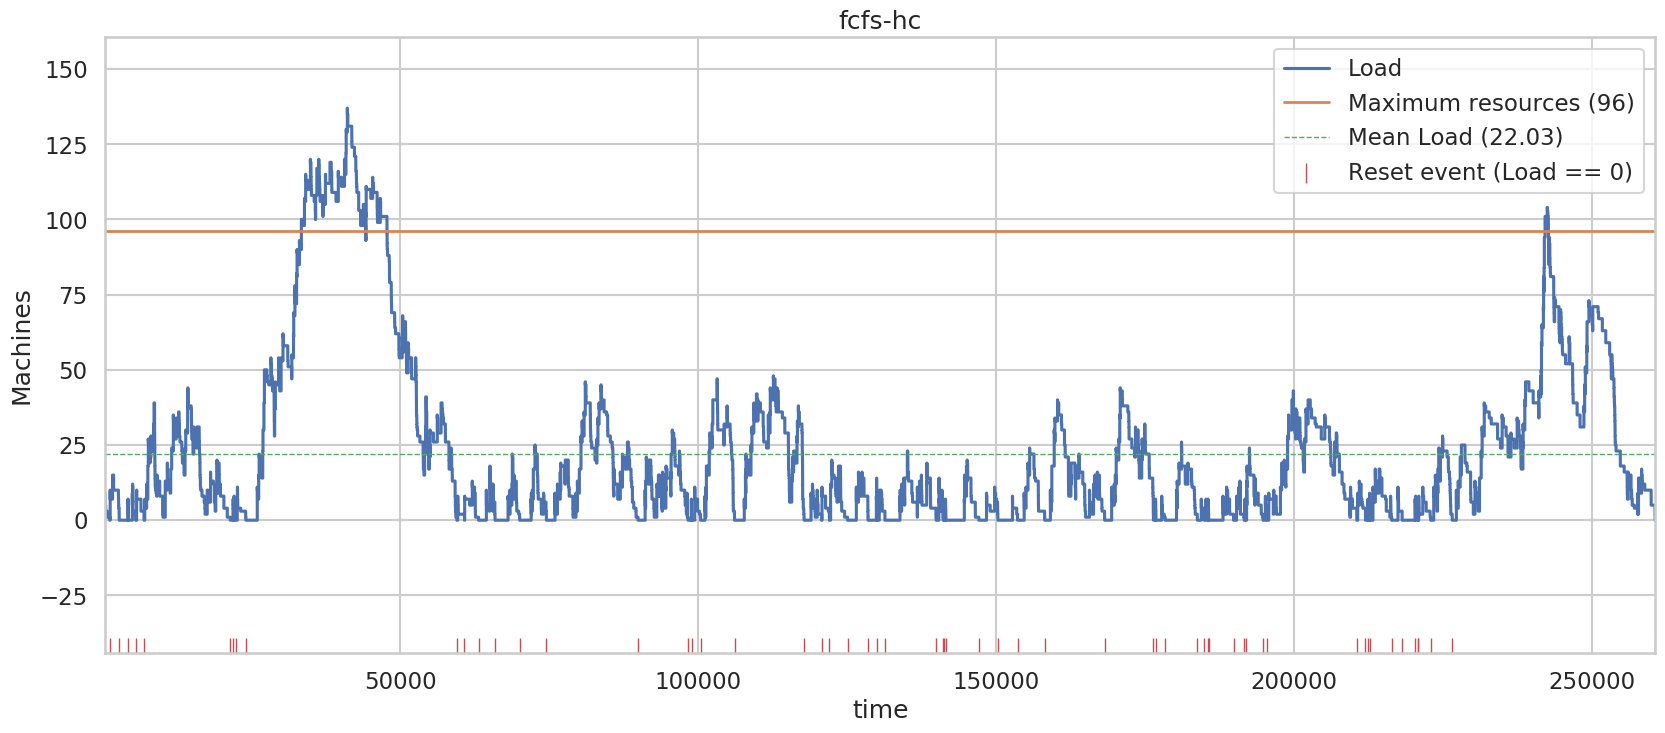

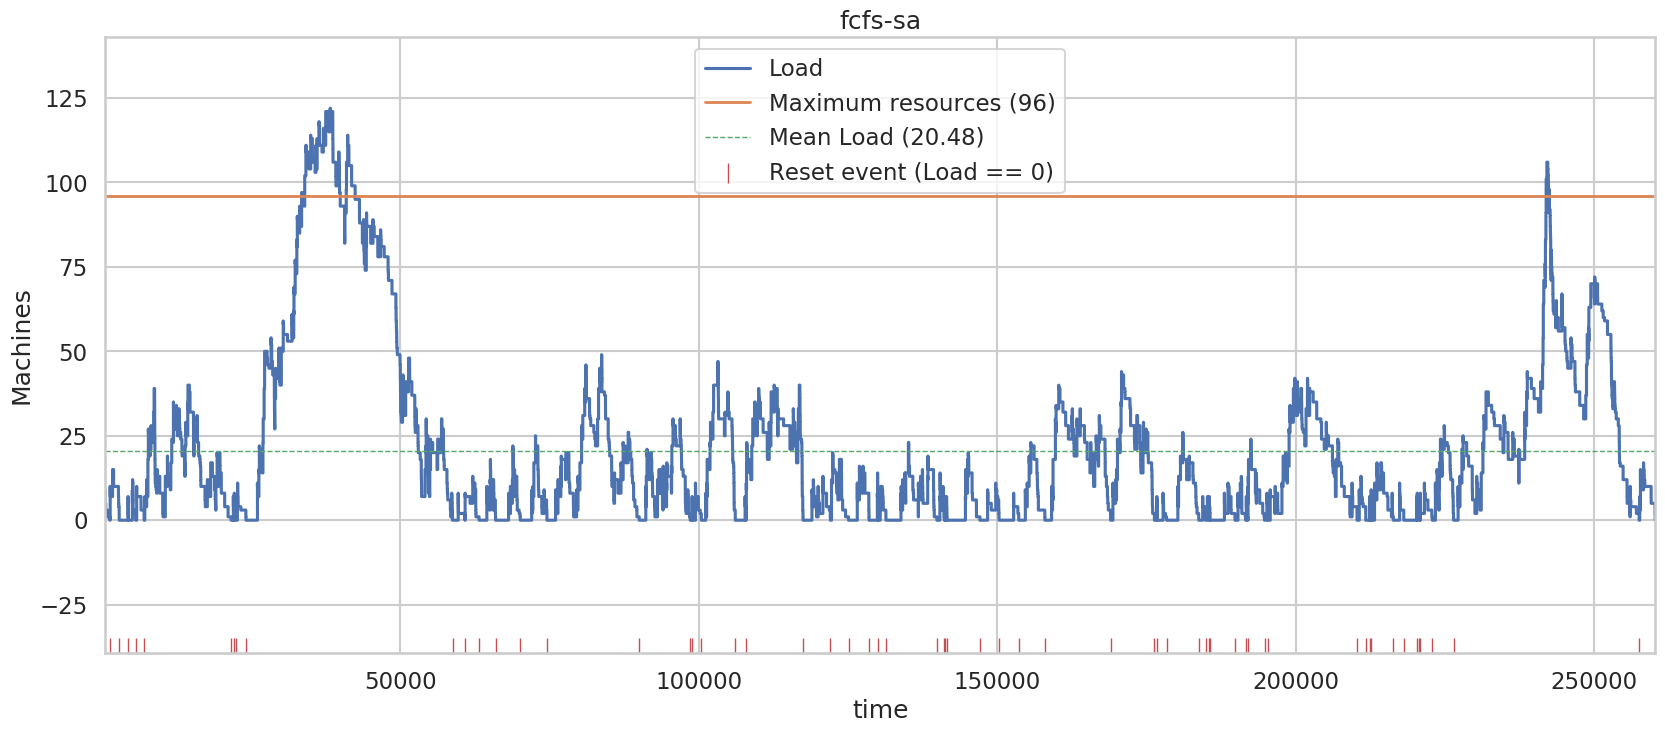

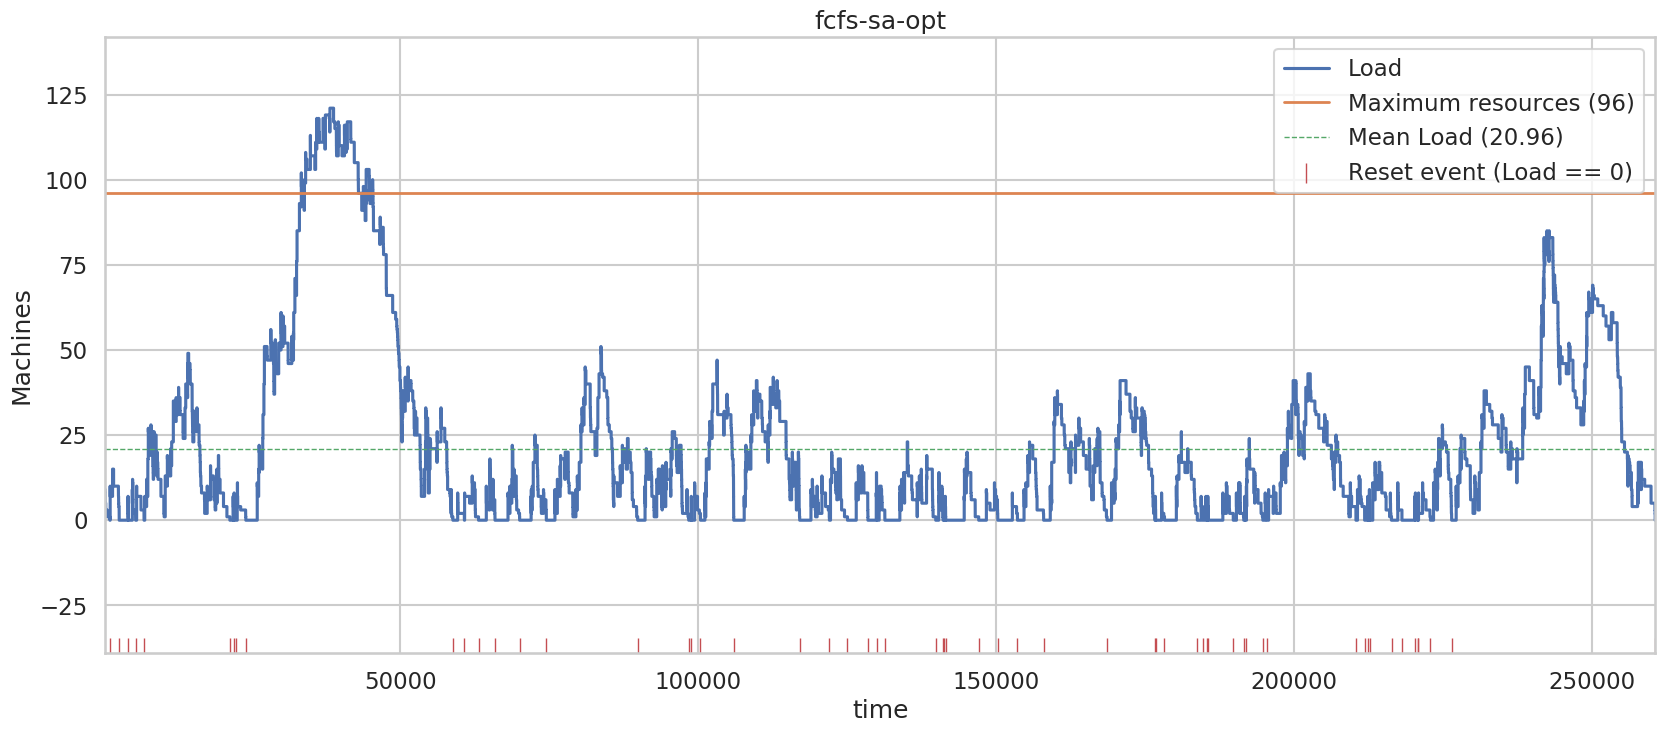

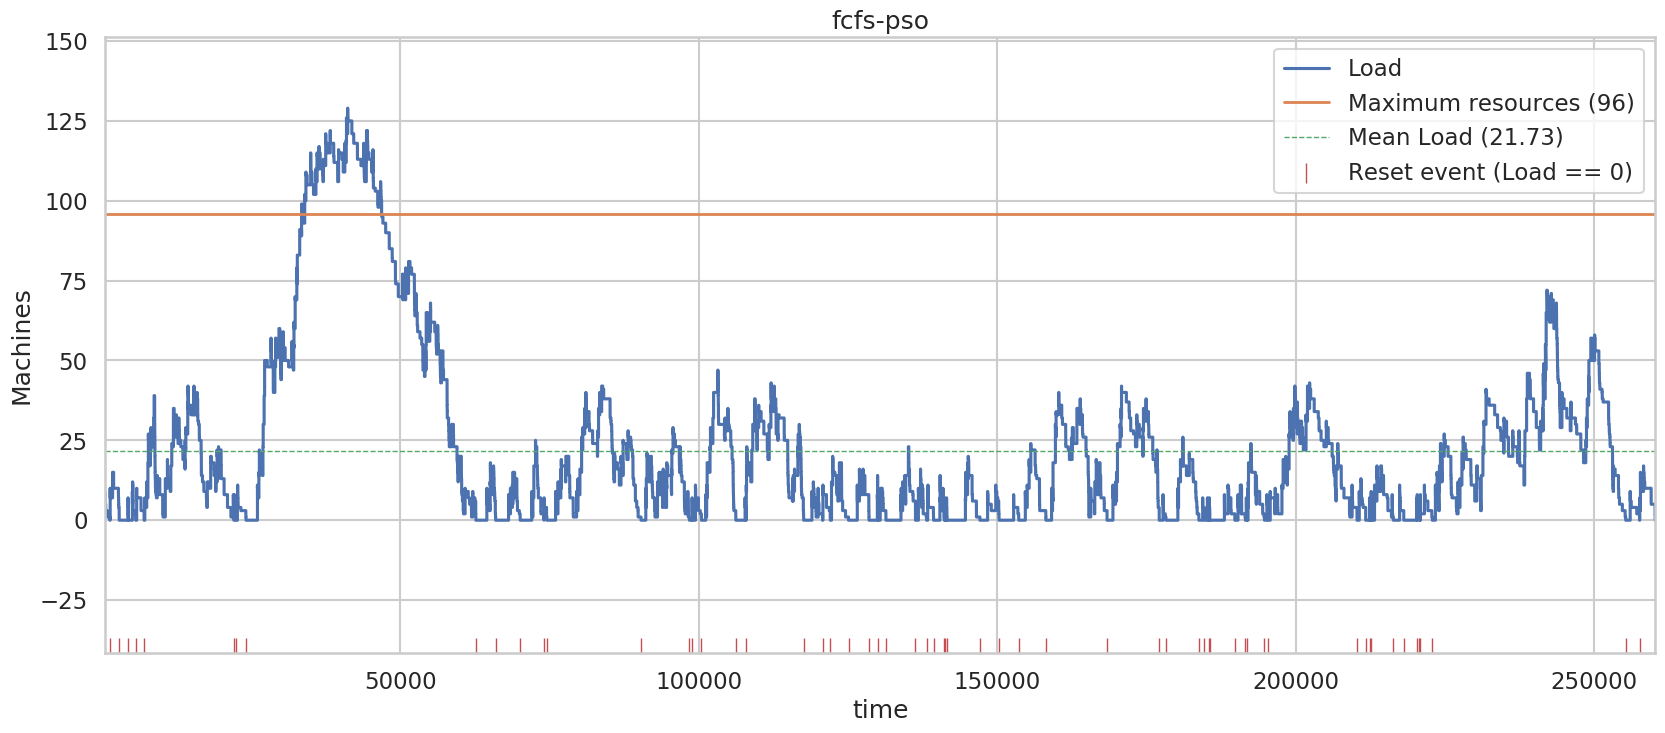

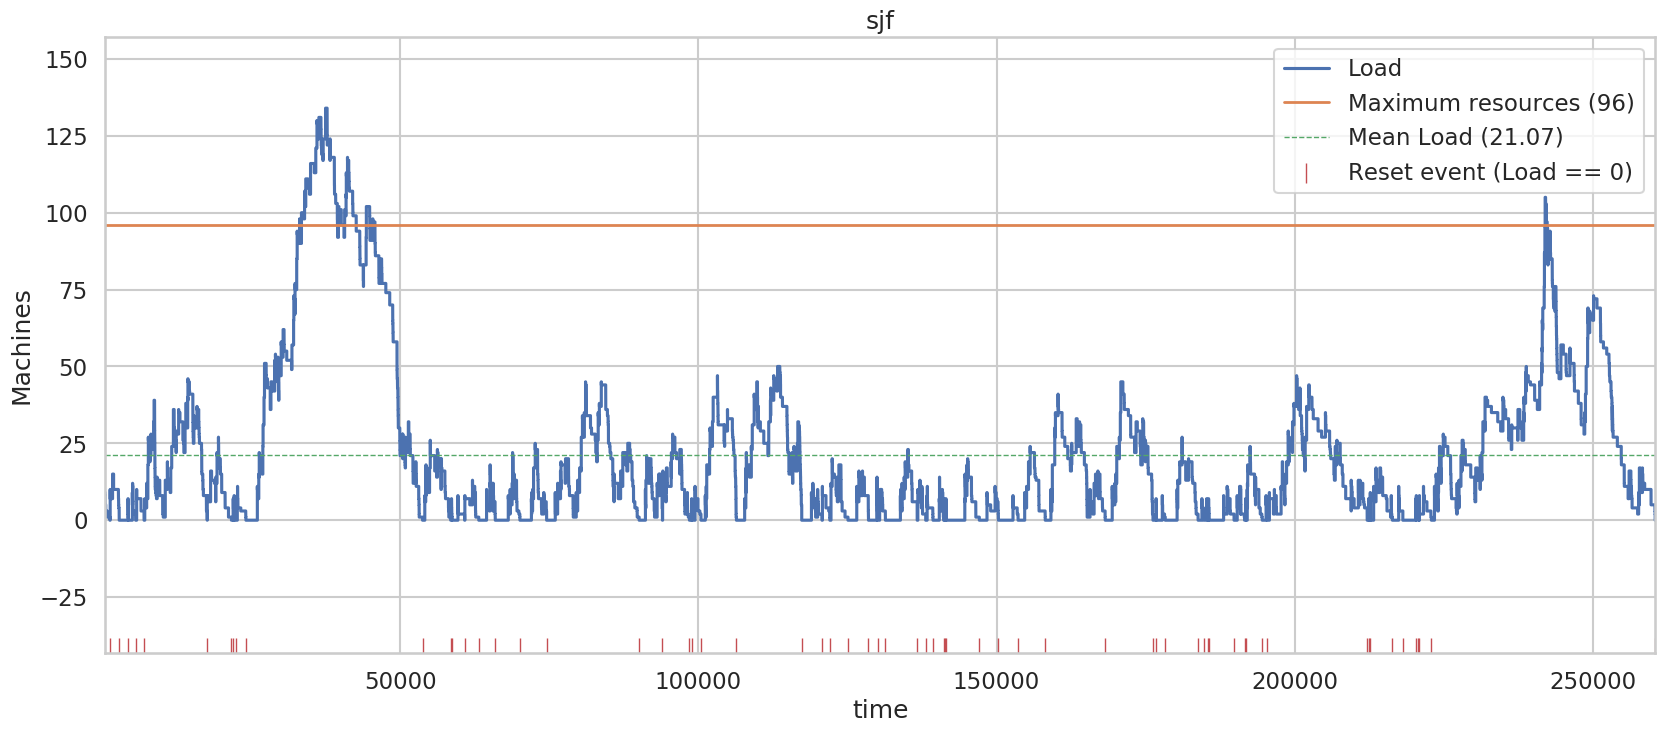

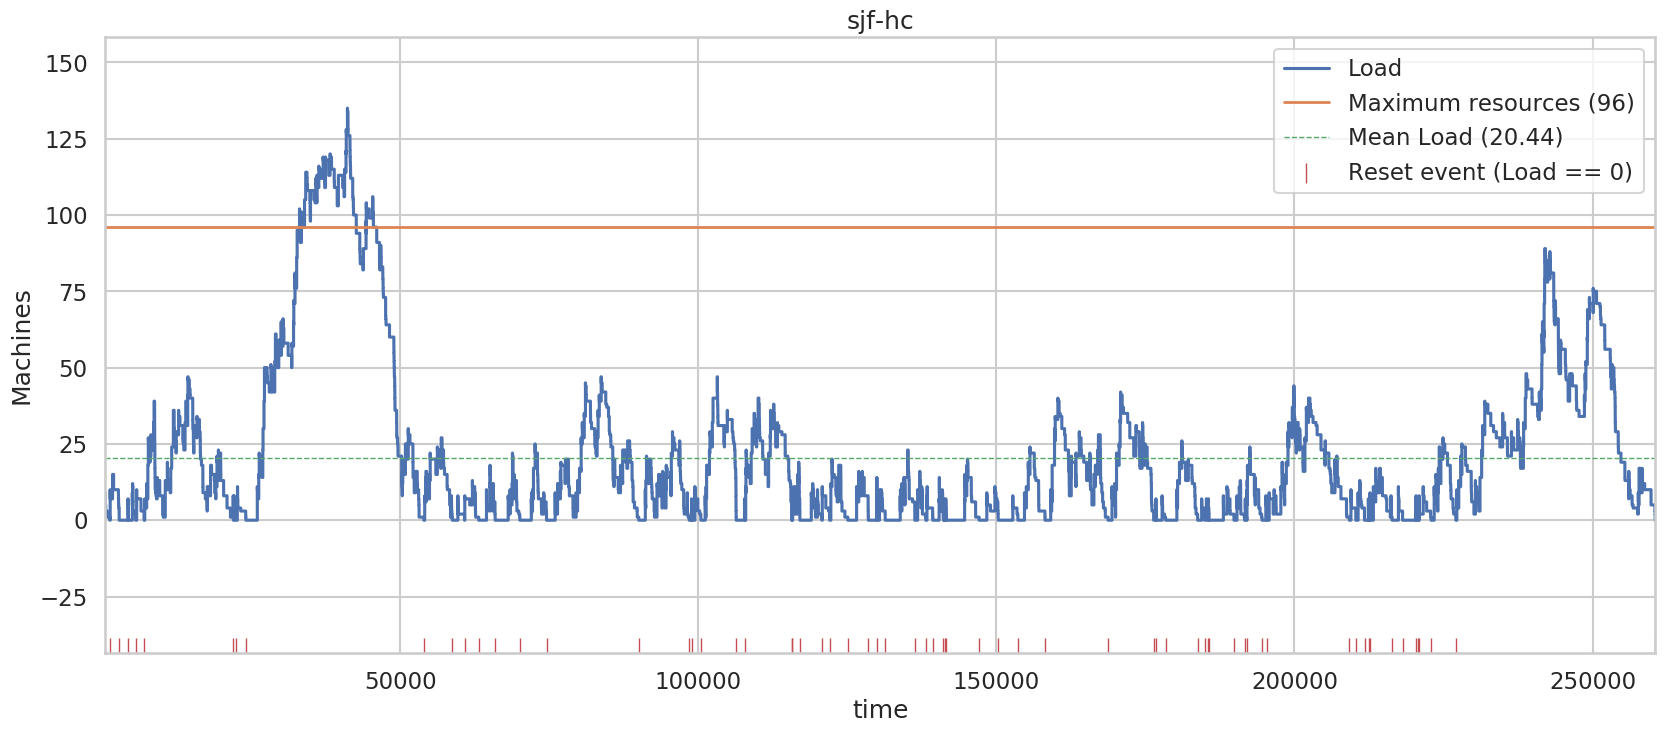

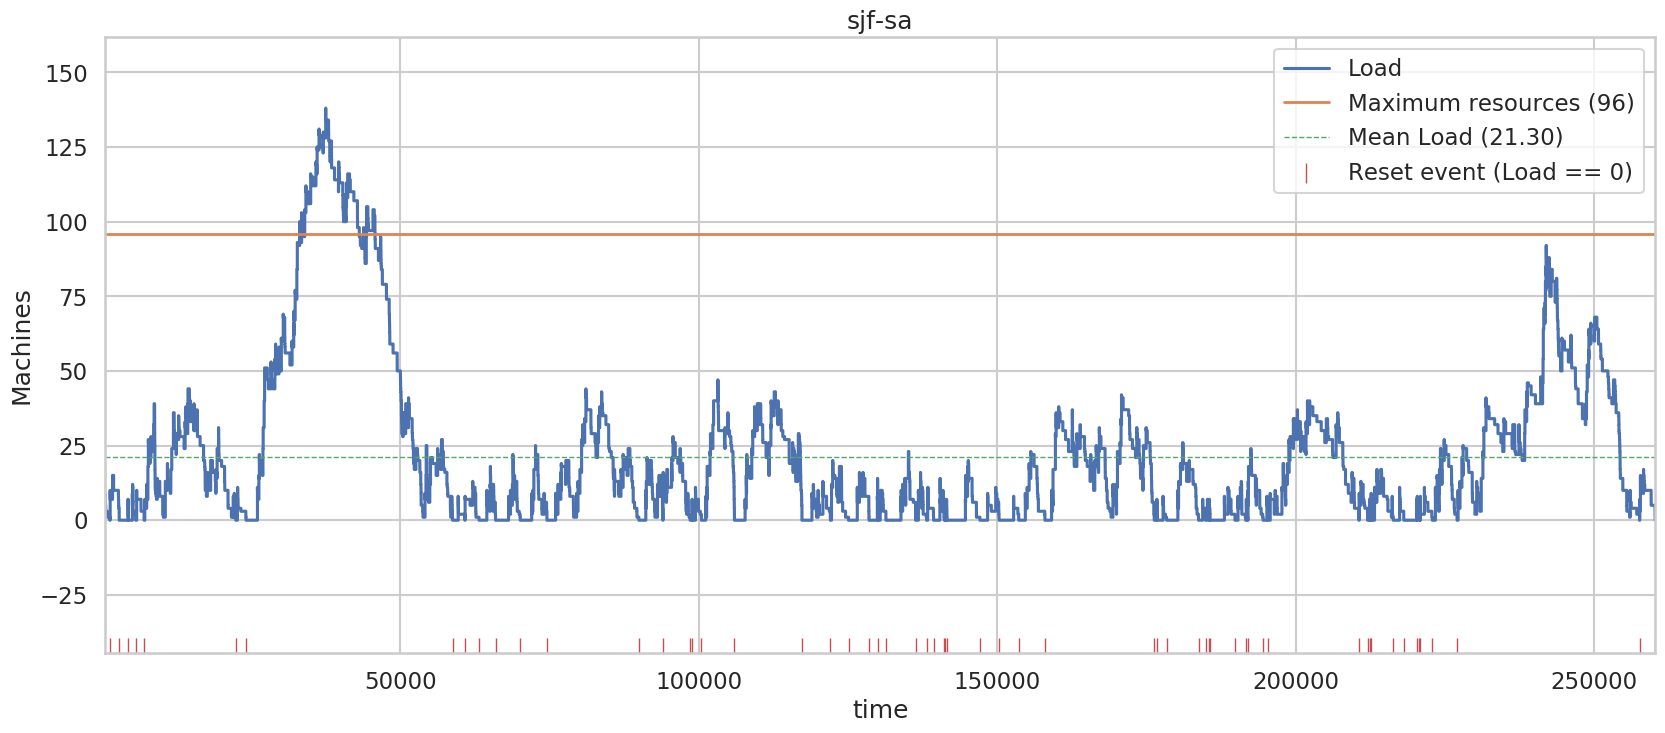

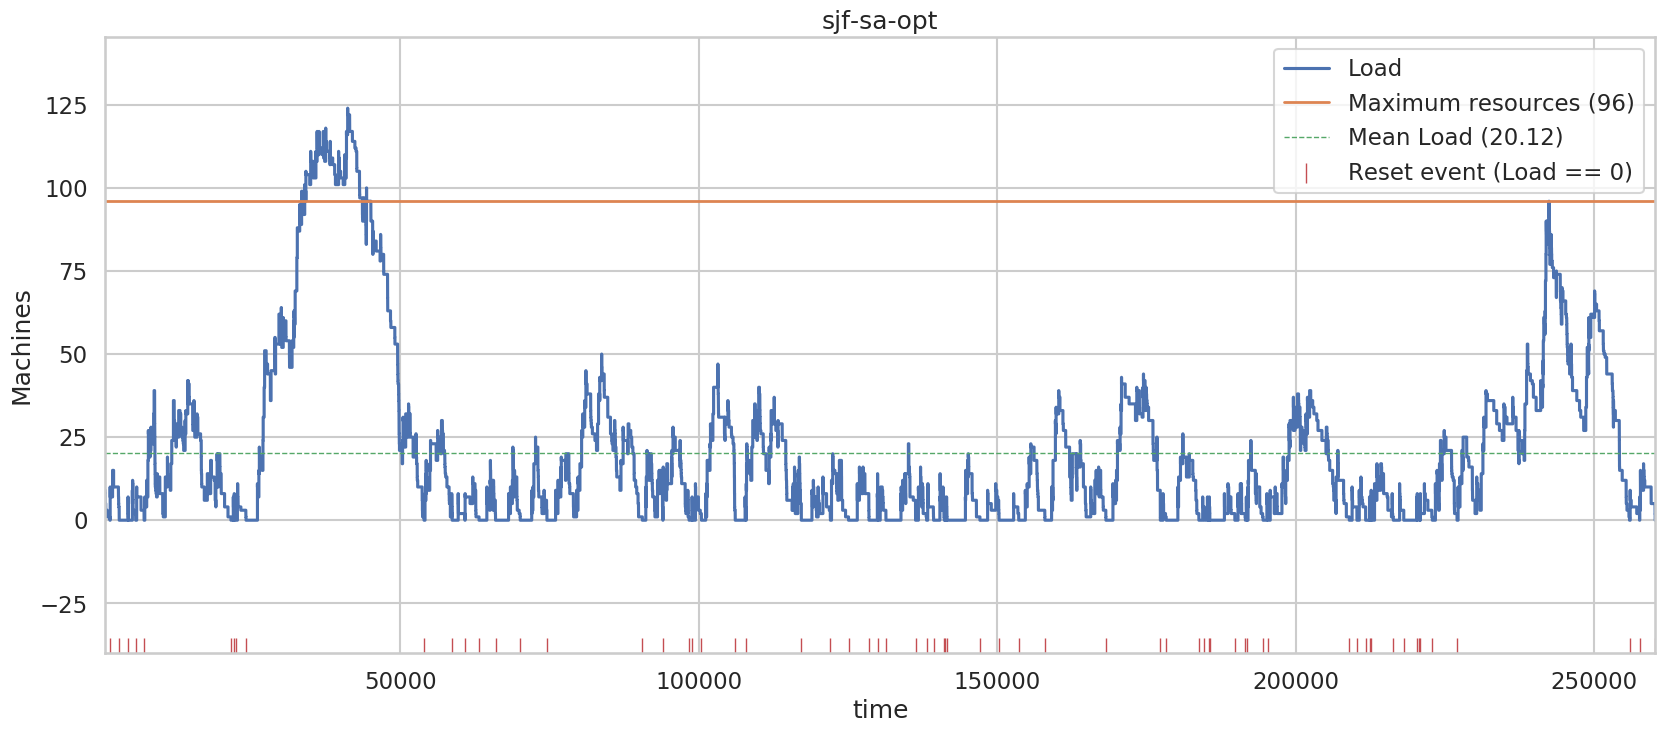

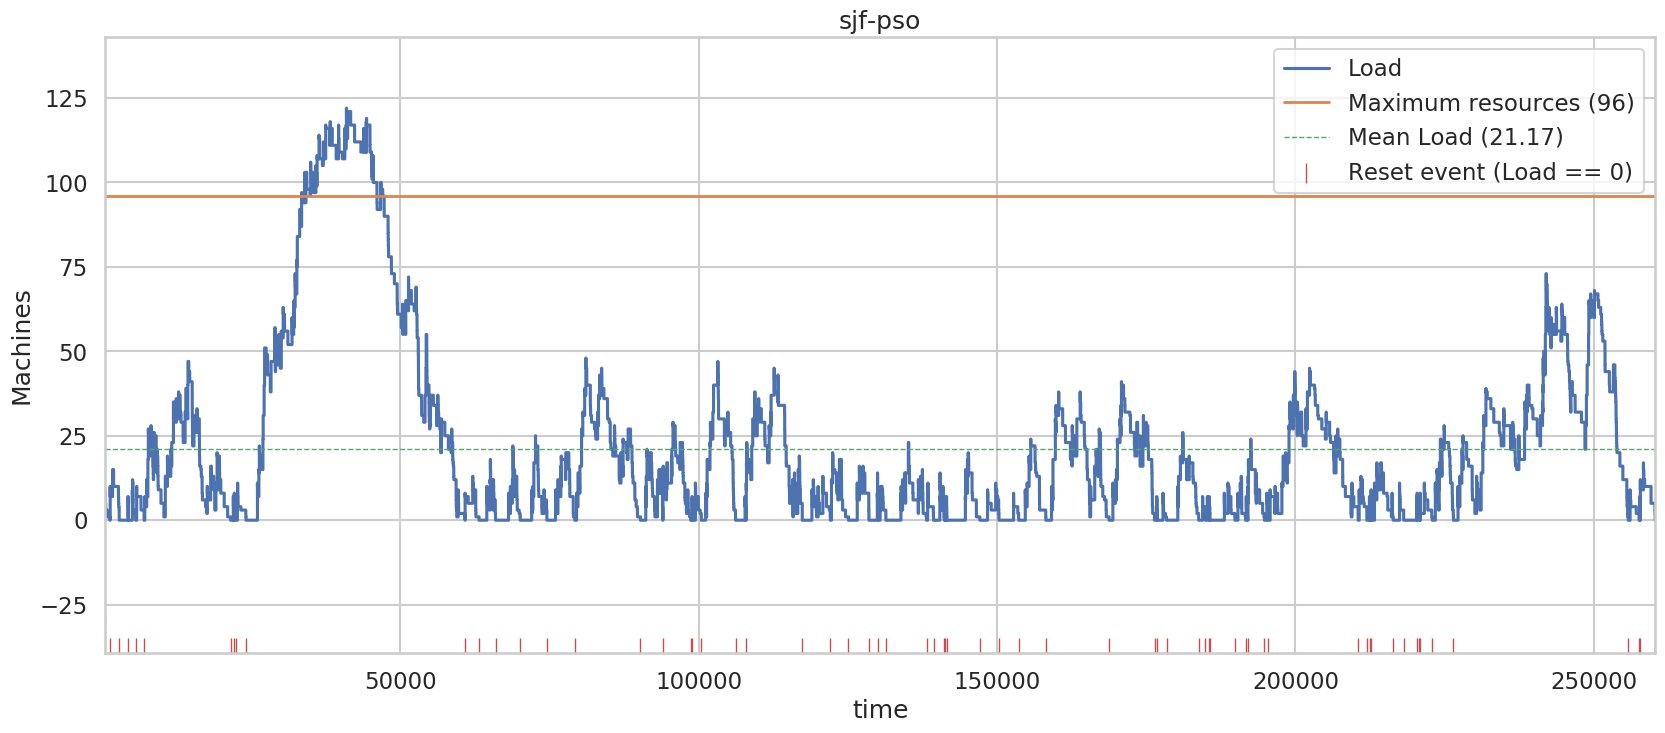

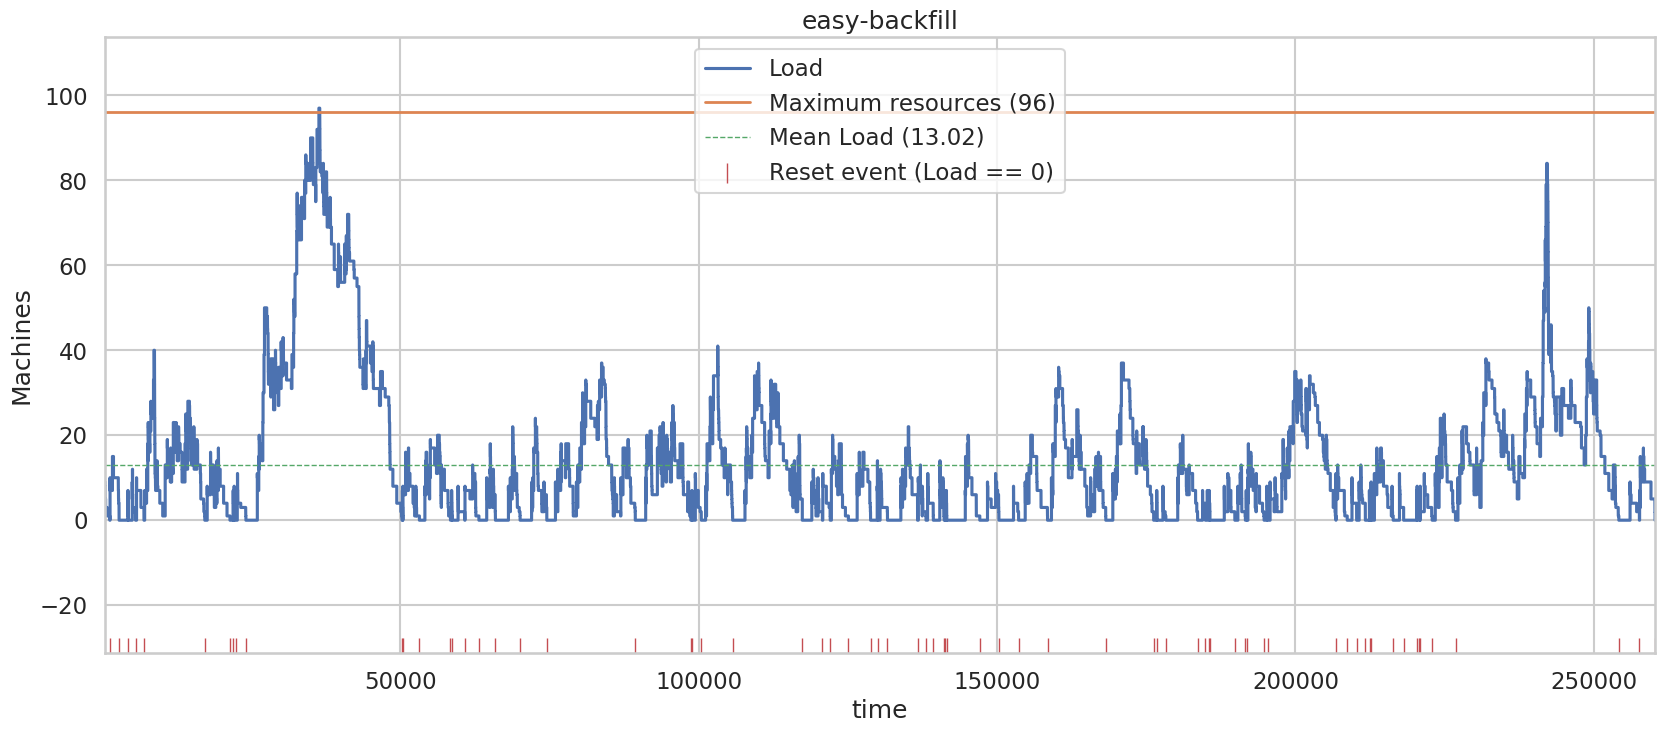

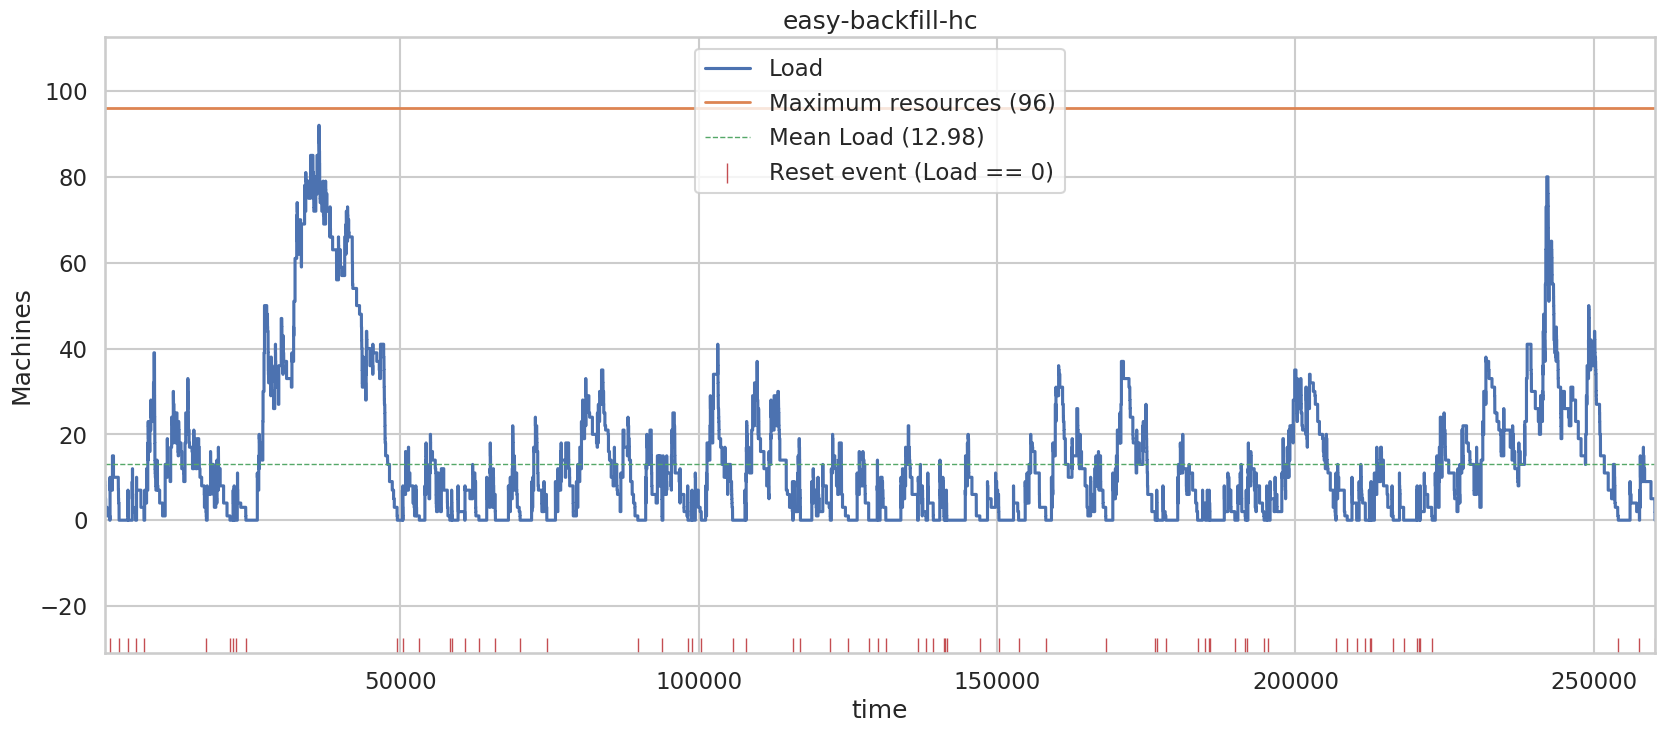

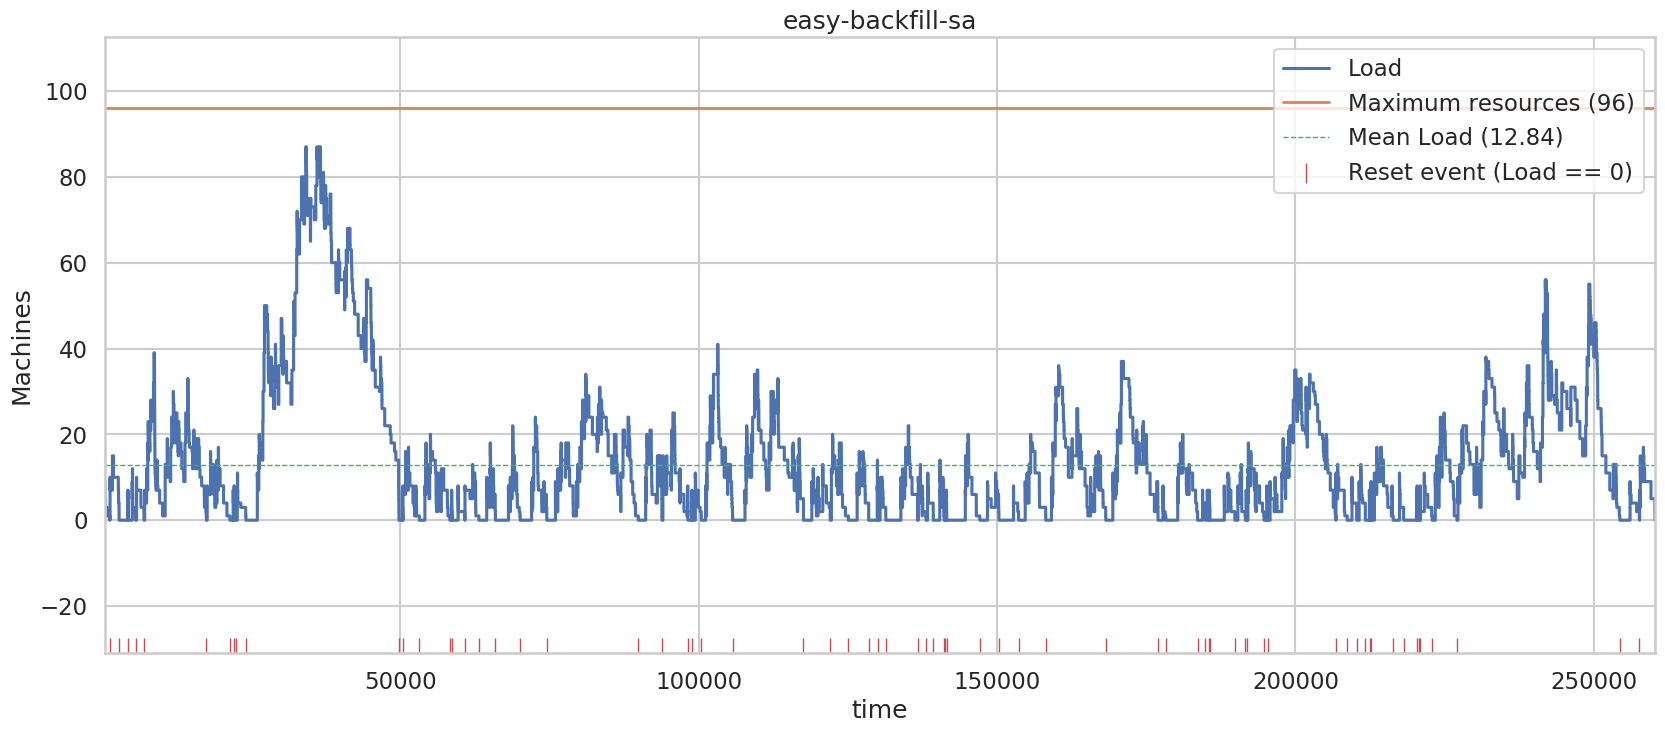

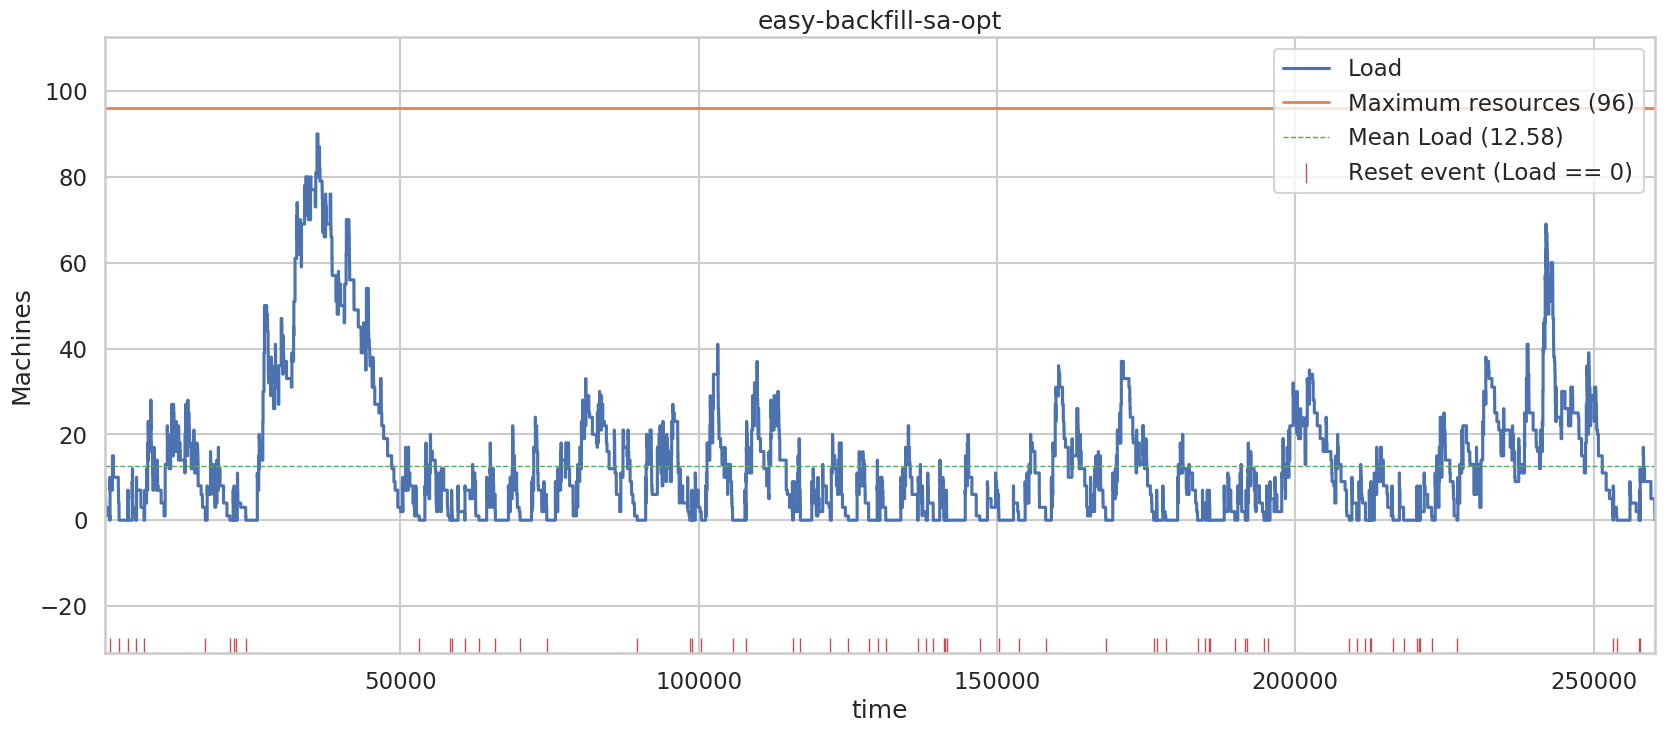

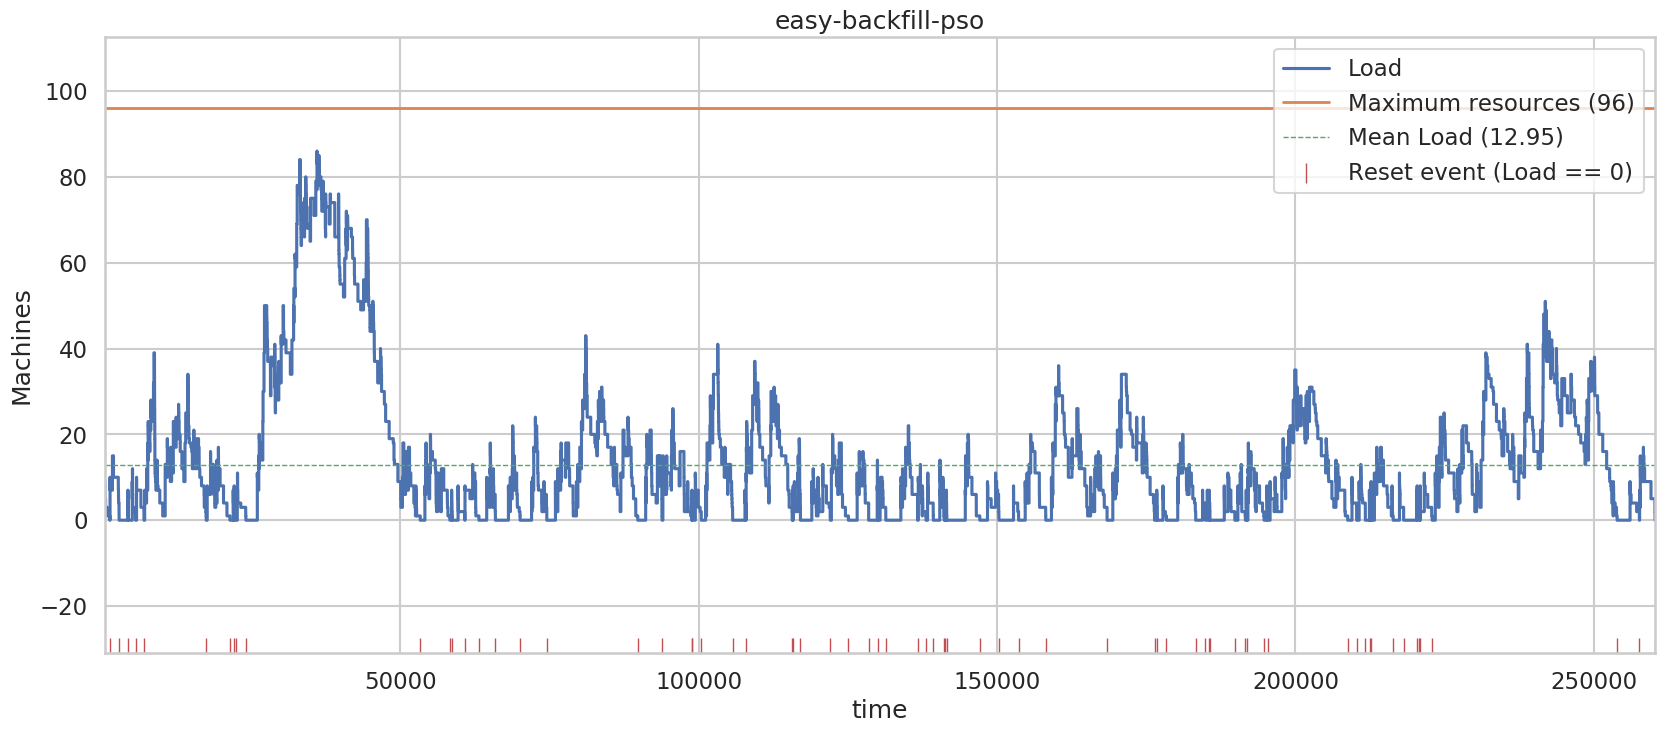

In [33]:
for schedule in schedule_names:
    print(f"{schedule}: {metrics.loc[schedule].compute_utilisation}")
    fig, ax = plt.subplots(figsize=(20,8))
    ax.set_title(schedule)
    evalys.visu.legacy.plot_load(jobsets[schedule].queue, nb_resources=96, ax=ax)

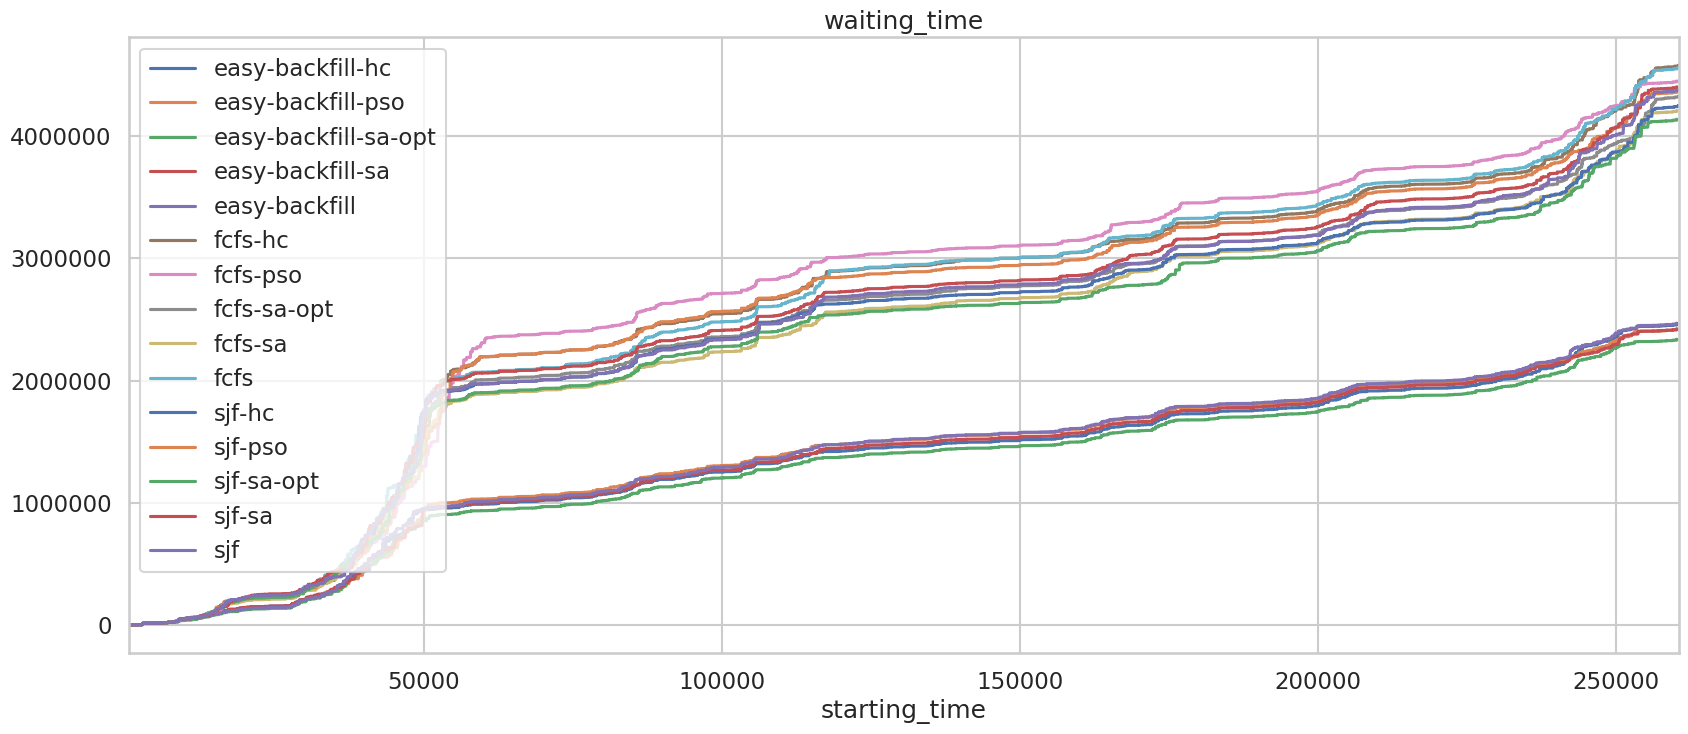

In [34]:
fig, ax = plt.subplots(figsize=(20,8))
evalys.visu.legacy.plot_series('waiting_time', jobsets)